# **Read XLXS File and intial Packages**

In [3]:

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Load your dataset from a CSV file
file_path = '/content/Ramsay_Data.xlsx'
df = pd.read_excel(file_path)
df.head()
df1=df


# **Create Additional Features and Attributes along with Data Quality Process**

In [4]:
df['Stay_Days'] = (df['SeparationDate'] - df['AdmissionDate']).dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   insurer_id               30000 non-null  object        
 1   episode_id               30000 non-null  int64         
 2   DateOfBirth              30000 non-null  datetime64[ns]
 3   Postcode                 30000 non-null  int64         
 4   Sex                      30000 non-null  object        
 5   AdmissionDate            30000 non-null  datetime64[ns]
 6   SeparationDate           30000 non-null  datetime64[ns]
 7   AR-DRG                   30000 non-null  object        
 8   ModeOfSeparation         30000 non-null  object        
 9   CareType                 30000 non-null  object        
 10  SourceOfReferral         30000 non-null  object        
 11  DischargeIntention       30000 non-null  object        
 12  AdmissionProviderID      30000 n

In [5]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
insurer_id                     0
episode_id                     0
DateOfBirth                    0
Postcode                       0
Sex                            0
AdmissionDate                  0
SeparationDate                 0
AR-DRG                         0
ModeOfSeparation               0
CareType                       0
SourceOfReferral               0
DischargeIntention             0
AdmissionProviderID            0
AdmissionTime                  0
UrgencyOfAdmission             0
SeparationTime                 0
PrincipalDiagnosis             0
Diagnosis2                     0
Diagnosis3                     0
Diagnosis4                     0
Principal_ProcedureCode        0
ProcedureCode2                 0
ProcedureCode3                 0
AccommodationCharge            0
CCU_Charges                17167
ICU_Charge                 17138
TheatreCharge              17164
PharmacyCharge             16735
ProsthesisCharge           17151
OtherCharges               

In [ ]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [insurer_id, episode_id, DateOfBirth, Postcode, Sex, AdmissionDate, SeparationDate, AR-DRG, ModeOfSeparation, CareType, SourceOfReferral, DischargeIntention, AdmissionProviderID, AdmissionTime, UrgencyOfAdmission, SeparationTime, PrincipalDiagnosis, Diagnosis2, Diagnosis3, Diagnosis4, Principal_ProcedureCode, ProcedureCode2, ProcedureCode3, AccommodationCharge, CCU_Charges, ICU_Charge, TheatreCharge, PharmacyCharge, ProsthesisCharge, OtherCharges, BundledCharges, UnplannedTheatreVisit, InfantWeight, Readmission28Days, HoursMechVentilation, PalliativeCareStatus, Age, Stay_Days]
Index: []

[0 rows x 38 columns]


In [6]:
#Convert Transaction Charges from Log to Antilog

#df['AccommodationCharge'] = 2**df['AccommodationCharge'].astype('float64').round(2)
df['AccommodationCharge'] = df['AccommodationCharge'].round(2)
#df['CCU_Charges'] = 2**df['CCU_Charges'].astype('float64').round(2)
df['CCU_Charges'] = df['CCU_Charges'].round(2)
#df['ICU_Charge'] = 2**df['ICU_Charge'].astype('float64').round(2)
df['ICU_Charge'] = df['ICU_Charge'].round(2)

## Convert string to float64
df['PharmacyCharge'] = pd.to_numeric(df['PharmacyCharge'], errors='coerce').astype('float64').round(2)
df['PharmacyCharge'] = np.log(df['PharmacyCharge'])

print(df[['AccommodationCharge','CCU_Charges','ICU_Charge','TheatreCharge','PharmacyCharge','ProsthesisCharge','OtherCharges','BundledCharges']])

       AccommodationCharge  CCU_Charges  ICU_Charge  TheatreCharge  \
0                     8.79         6.62        7.38        1414.53   
1                    13.17          NaN         NaN         224.32   
2                     8.34          NaN         NaN            NaN   
3                    14.61          NaN         NaN            NaN   
4                     7.20          NaN        7.87         317.36   
...                    ...          ...         ...            ...   
29995                14.95          NaN         NaN            NaN   
29996                13.15          NaN       11.50            NaN   
29997                15.65          NaN         NaN            NaN   
29998                 8.46          NaN         NaN            NaN   
29999                 7.25          NaN         NaN            NaN   

       PharmacyCharge  ProsthesisCharge  OtherCharges  BundledCharges  
0              255.67           360.690           NaN             NaN  
1              

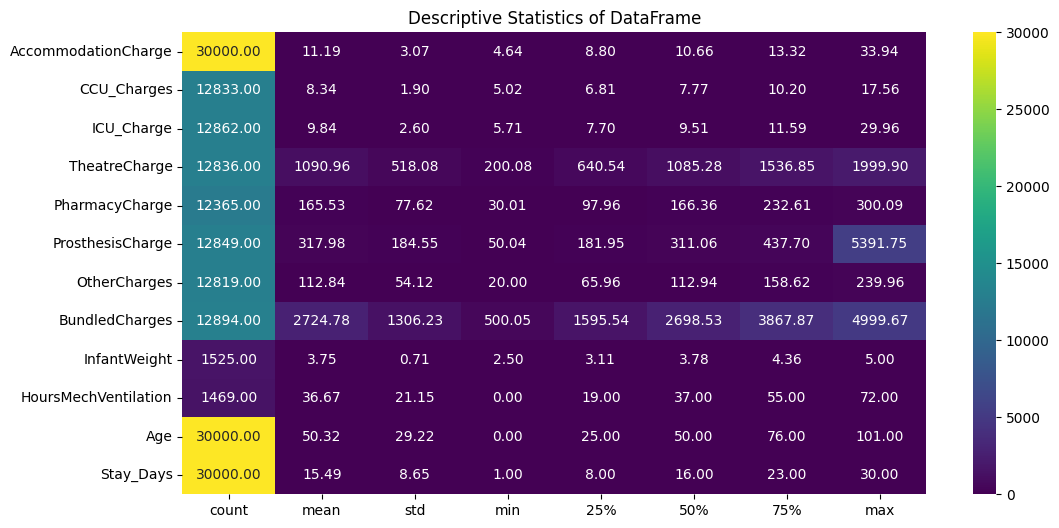

In [ ]:
# Get descriptive statistics for numerical columns only
# By selecting only numerical types, you avoid including Timestamp columns.
df1 = df.drop(['AdmissionProviderID','episode_id','Postcode'],axis=1)
desc_stats = df1.describe(include=[np.number])

# Transpose for easier plotting
desc_stats = desc_stats.T

# Plotting using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.heatmap(desc_stats, annot=True, cmap='viridis', fmt=".2f")
plt.title('Descriptive Statistics of DataFrame')
plt.show()

# **Fill NaNs with zeros**

In [7]:
df = df.fillna(0)
df.head()

insurer_id  episode_id DateOfBirth  Postcode Sex AdmissionDate  \
0        EAQ       78773  2015-03-24     64012   F    2024-07-22   
1        YMX         325  1970-01-04     37800   F    2023-10-05   
2        RQU       44678  2020-01-08     31072   F    2024-02-02   
3        QCO       83603  1982-12-28     33340   F    2022-08-02   
4        EAQ       85397  2020-09-23     58698   M    2022-08-30   

  SeparationDate  AR-DRG ModeOfSeparation    CareType  ... ProsthesisCharge  \
0     2024-07-29    C63A            Other   Inpatient  ...           360.69   
1     2023-11-03    P05A            Other  Outpatient  ...            94.25   
2     2024-02-08    B03C         Transfer   Emergency  ...             0.00   
3     2022-08-27    B80A            Other   Inpatient  ...             0.00   
4     2022-09-07  DRG002         Transfer   Inpatient  ...           387.57   

  OtherCharges  BundledCharges UnplannedTheatreVisit InfantWeight  \
0         0.00            0.00                     0         0.00   
1        55.01            0.00                     0         0.00   
2         0.00         3752.66                     0         0.00   
3        90.51            0.00                    No         0.00   
4        69.16            0.00                     0         4.14   

  Readmission28Days HoursMechVentilation PalliativeCareStatus Age Stay_Days  
0                 0                  0.0                    0   9         7  
1                 0                  0.0                    0  54        29  
2                 0                  0.0                    0   4         6  
3                 0                  0.0                    0  41        25  
4                 0                  0.0                    0   4         8  

[5 rows x 38 columns]

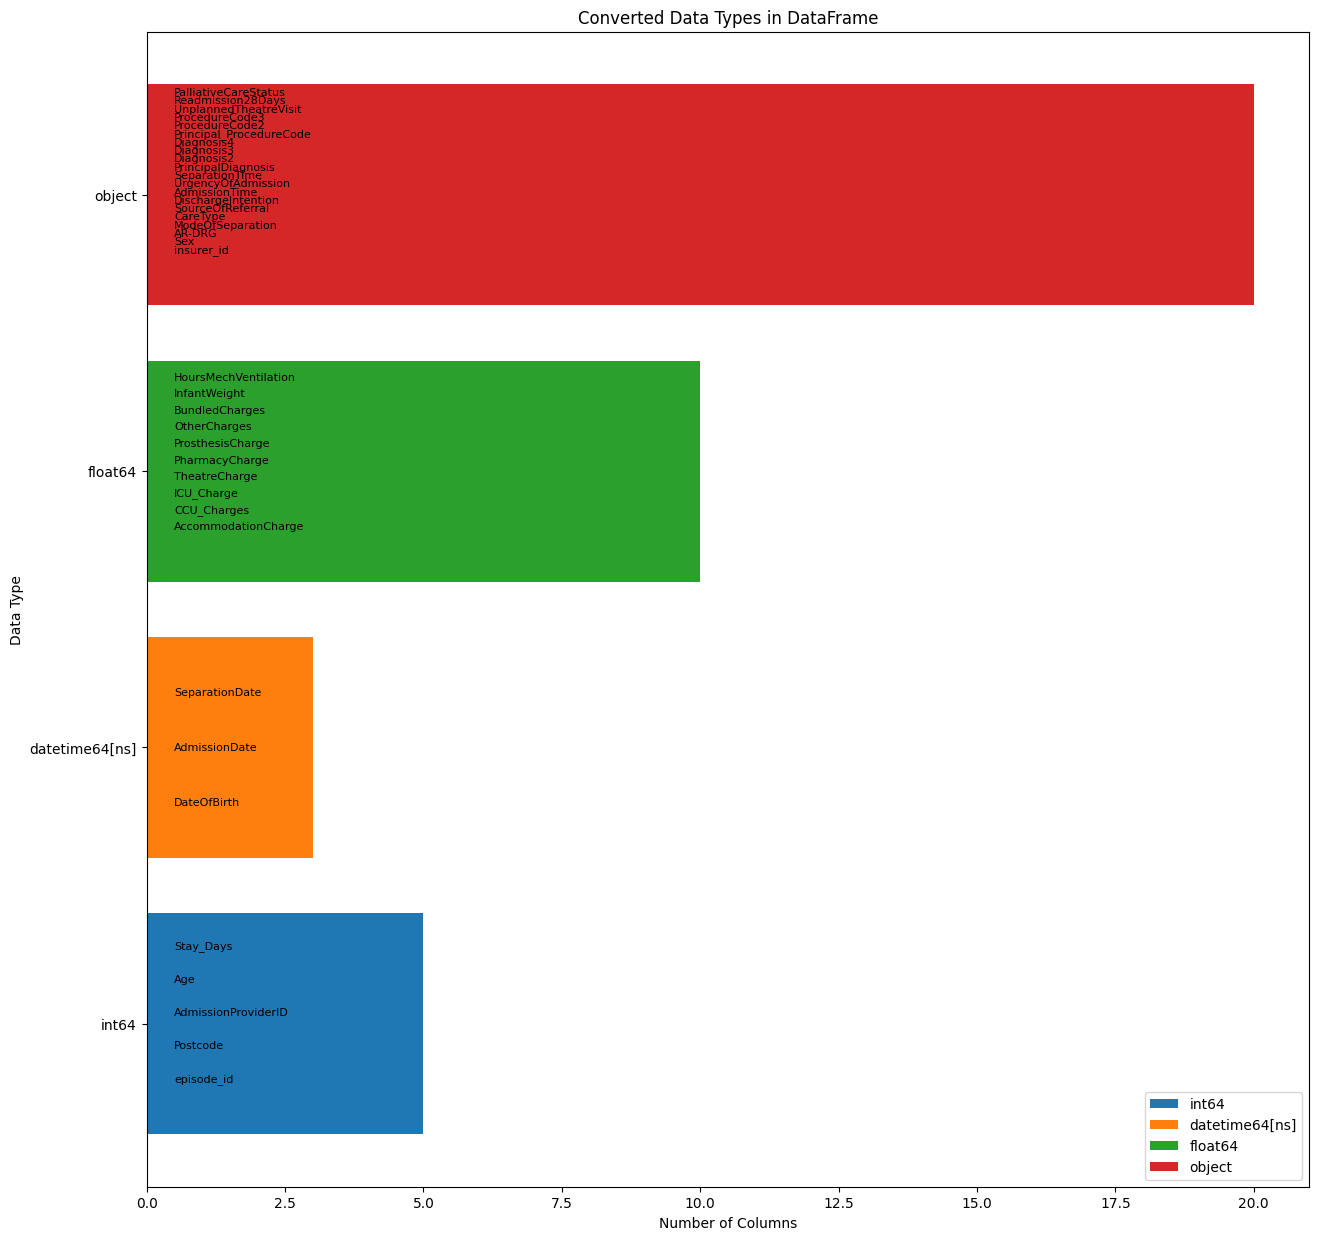

In [ ]:

# Group columns by data type
grouped_data_types = df.columns.to_series().groupby(df.dtypes).groups

# Create a horizontal bar chart
plt.figure(figsize=(15, 15))  # Adjust figure size as needed

y_pos = 0
for dtype, columns in grouped_data_types.items():
    plt.barh(y_pos, len(columns), label=dtype)

    # Display column names within the bar
    for i, column in enumerate(columns):
        plt.text(0.5, y_pos - 0.2 + (i * 0.6/ len(columns)), column, ha='left', va='center', fontsize=8)

    y_pos += 1

# Set the title and labels
plt.title('Converted Data Types in DataFrame')
plt.xlabel('Number of Columns')
plt.ylabel('Data Type')

# Customize y-axis ticks
plt.yticks(np.arange(len(grouped_data_types)), [str(dtype) for dtype in grouped_data_types.keys()])

# Add legend
plt.legend()

# Display the chart
plt.show()

In [8]:
## Add Column Total Charges
df['Total_Charges'] = df['AccommodationCharge'] + df['CCU_Charges'] + df['ICU_Charge'] + df['TheatreCharge'] + df['PharmacyCharge'] + df['ProsthesisCharge'] + df['OtherCharges'] + df['BundledCharges']
df['Total_Charges'] = df['Total_Charges'].round(2)
df.head()

insurer_id  episode_id DateOfBirth  Postcode Sex AdmissionDate  \
0        EAQ       78773  2015-03-24     64012   F    2024-07-22   
1        YMX         325  1970-01-04     37800   F    2023-10-05   
2        RQU       44678  2020-01-08     31072   F    2024-02-02   
3        QCO       83603  1982-12-28     33340   F    2022-08-02   
4        EAQ       85397  2020-09-23     58698   M    2022-08-30   

  SeparationDate  AR-DRG ModeOfSeparation    CareType  ... OtherCharges  \
0     2024-07-29    C63A            Other   Inpatient  ...         0.00   
1     2023-11-03    P05A            Other  Outpatient  ...        55.01   
2     2024-02-08    B03C         Transfer   Emergency  ...         0.00   
3     2022-08-27    B80A            Other   Inpatient  ...        90.51   
4     2022-09-07  DRG002         Transfer   Inpatient  ...        69.16   

  BundledCharges  UnplannedTheatreVisit InfantWeight Readmission28Days  \
0           0.00                      0         0.00                 0   
1           0.00                      0         0.00                 0   
2        3752.66                      0         0.00                 0   
3           0.00                     No         0.00                 0   
4           0.00                      0         4.14                 0   

  HoursMechVentilation PalliativeCareStatus Age Stay_Days Total_Charges  
0                  0.0                    0   9         7       2053.68  
1                  0.0                    0  54        29        553.04  
2                  0.0                    0   4         6       3953.90  
3                  0.0                    0  41        25        105.12  
4                  0.0                    0   4         8       1071.13  

[5 rows x 39 columns]

In [11]:
df.describe()

episode_id                 DateOfBirth      Postcode  \
count  30000.000000                       30000  30000.000000   
mean   50033.716400  1973-12-23 14:30:14.400000  50024.200033   
min        0.000000         1923-08-03 00:00:00    504.000000   
25%    25133.750000         1948-08-28 12:00:00  25599.750000   
50%    49877.000000         1973-11-18 12:00:00  49760.500000   
75%    75086.750000         1999-03-12 00:00:00  74689.750000   
max    99997.000000         2024-07-24 00:00:00  99947.000000   
std    28877.713709                         NaN  28630.887452   

                       AdmissionDate              SeparationDate  \
count                          30000                       30000   
mean   2023-08-03 05:13:29.280000256  2023-08-18 17:04:07.680000   
min              2022-08-01 00:00:00         2022-08-02 00:00:00   
25%              2023-02-02 00:00:00         2023-02-18 00:00:00   
50%              2023-08-02 00:00:00         2023-08-17 00:00:00   
75%              2024-02-03 00:00:00         2024-02-20 00:00:00   
max              2024-07-31 00:00:00         2024-08-29 00:00:00   
std                              NaN                         NaN   

       AdmissionProviderID  AccommodationCharge   CCU_Charges    ICU_Charge  \
count         3.000000e+04         30000.000000  30000.000000  30000.000000   
mean          5.346018e+06            11.189221      3.569638      4.218407   
min           5.001550e+05             4.640000      0.000000      0.000000   
25%           2.797561e+06             8.800000      0.000000      0.000000   
50%           5.939456e+06            10.660000      0.000000      0.000000   
75%           7.568241e+06            13.320000      7.240000      8.590000   
max           9.924619e+06            33.940000     17.560000     29.960000   
std           2.808776e+06             3.068058      4.312475      5.158868   

       TheatreCharge  PharmacyCharge  ProsthesisCharge  OtherCharges  \
count   30000.000000    30000.000000      30000.000000  30000.000000   
mean      466.784102       68.227829        136.192065     48.218333   
min         0.000000        0.000000          0.000000      0.000000   
25%         0.000000        0.000000          0.000000      0.000000   
50%         0.000000        0.000000          0.000000      0.000000   
75%       935.985000      137.333080        267.039000     97.420500   
max      1999.900000      300.092322       5391.750000    239.964000   
std       637.339069       95.511689        198.356881     66.087350   

       BundledCharges  InfantWeight  HoursMechVentilation           Age  \
count    30000.000000  30000.000000          30000.000000  30000.000000   
mean      1171.112147      0.190691              1.795367     50.323600   
min          0.000000      0.000000              0.000000      0.000000   
25%          0.000000      0.000000              0.000000     25.000000   
50%          0.000000      0.000000              0.000000     50.000000   
75%       2335.385000      0.000000              0.000000     76.000000   
max       4999.670000      5.000000             72.000000    101.000000   
std       1597.777891      0.839481              9.192343     29.217789   

          Stay_Days  Total_Charges  
count  30000.000000   30000.000000  
mean      15.493500    1909.511718  
min        1.000000       6.510000  
25%        8.000000     367.485000  
50%       16.000000    1434.590000  
75%       23.000000    3091.085000  
max       30.000000    8415.450000  
std        8.649878    1761.029698

# **Find Anomlaies in Data**

In [12]:
# Example age group division

df1= df[df['InfantWeight'] > 0.0]
# Define age group bins and labels
age_bins = np.linspace(df1['Age'].min(), df1['Age'].max(), 11)
age_labels = [f'{int(age_bins[i])}-{int(age_bins[i+1])}' for i in range(len(age_bins) - 1)]

# Create Age_Group column
df1['Age_Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Calculate frequency for each age group
age_group_counts = df1['Age_Group'].value_counts().sort_index()

# Create the box plot with styling
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility

ax = sns.boxplot(x='InfantWeight', y='Age_Group', data=df,
                 palette="bright",  # Use a pastel color palette
                 linewidth=1.5,     # Increase boxplot line width
                 fliersize=3)       # Reduce outlier marker size

# Add frequency annotations with improved styling
for i, age_group in enumerate(age_group_counts.index):
    ax.text(1.2, i, f'n = {age_group_counts[age_group]}',
            va='center', ha='left', color='black', fontsize=10)

# Customize plot elements
plt.xlabel('Infant Weight', fontsize=12)
plt.ylabel('Age Group (Years)', fontsize=12)
plt.title('Distribution of Infant Weight by Age Group (10 Bins)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add subtle gridlines
sns.despine(left=True)  # Remove the left spine for a cleaner look

plt.tight_layout()
plt.show()

<ipython-input-12-ccd87bfb139c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, include_lowest=True)


ValueError: Could not interpret value `Age_Group` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1525 entries, 4 to 29987
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   insurer_id               1525 non-null   object        
 1   episode_id               1525 non-null   int64         
 2   DateOfBirth              1525 non-null   datetime64[ns]
 3   Postcode                 1525 non-null   int64         
 4   Sex                      1525 non-null   object        
 5   AdmissionDate            1525 non-null   datetime64[ns]
 6   SeparationDate           1525 non-null   datetime64[ns]
 7   AR-DRG                   1525 non-null   object        
 8   ModeOfSeparation         1525 non-null   object        
 9   CareType                 1525 non-null   object        
 10  SourceOfReferral         1525 non-null   object        
 11  DischargeIntention       1525 non-null   object        
 12  AdmissionProviderID      1525 non-null

# **Find Correlation Matrix**

# **Convert Categorical Variables into Continous/Binary Variables using one hot coding**

In [ ]:
df.head()

insurer_id  episode_id DateOfBirth  Postcode Sex AdmissionDate  \
0        EAQ       78773  2015-03-24     64012   F    2024-07-22   
1        YMX         325  1970-01-04     37800   F    2023-10-05   
2        RQU       44678  2020-01-08     31072   F    2024-02-02   
3        QCO       83603  1982-12-28     33340   F    2022-08-02   
4        EAQ       85397  2020-09-23     58698   M    2022-08-30   

  SeparationDate  AR-DRG ModeOfSeparation    CareType  ... BundledCharges  \
0     2024-07-29    C63A            Other   Inpatient  ...           0.00   
1     2023-11-03    P05A            Other  Outpatient  ...           0.00   
2     2024-02-08    B03C         Transfer   Emergency  ...        3752.66   
3     2022-08-27    B80A            Other   Inpatient  ...           0.00   
4     2022-09-07  DRG002         Transfer   Inpatient  ...           0.00   

  UnplannedTheatreVisit  InfantWeight Readmission28Days HoursMechVentilation  \
0                     0          0.00                 0                  0.0   
1                     0          0.00                 0                  0.0   
2                     0          0.00                 0                  0.0   
3                    No          0.00                 0                  0.0   
4                     0          4.14                 0                  0.0   

  PalliativeCareStatus Age Stay_Days Total_Charges Age_Group  
0                    0   9         7       2053.68      0-10  
1                    0  54        29        553.04     50-60  
2                    0   4         6       3953.90      0-10  
3                    0  41        25        105.12     40-50  
4                    0   4         8       1071.13      0-10  

[5 rows x 40 columns]

In [ ]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

df2 = df.drop(['Date of Birth', 'Admission Date', 'Separation Date','DateOfBirth','AdmissionDate','SeparationDate','Age_Group'], axis=1, errors='ignore')

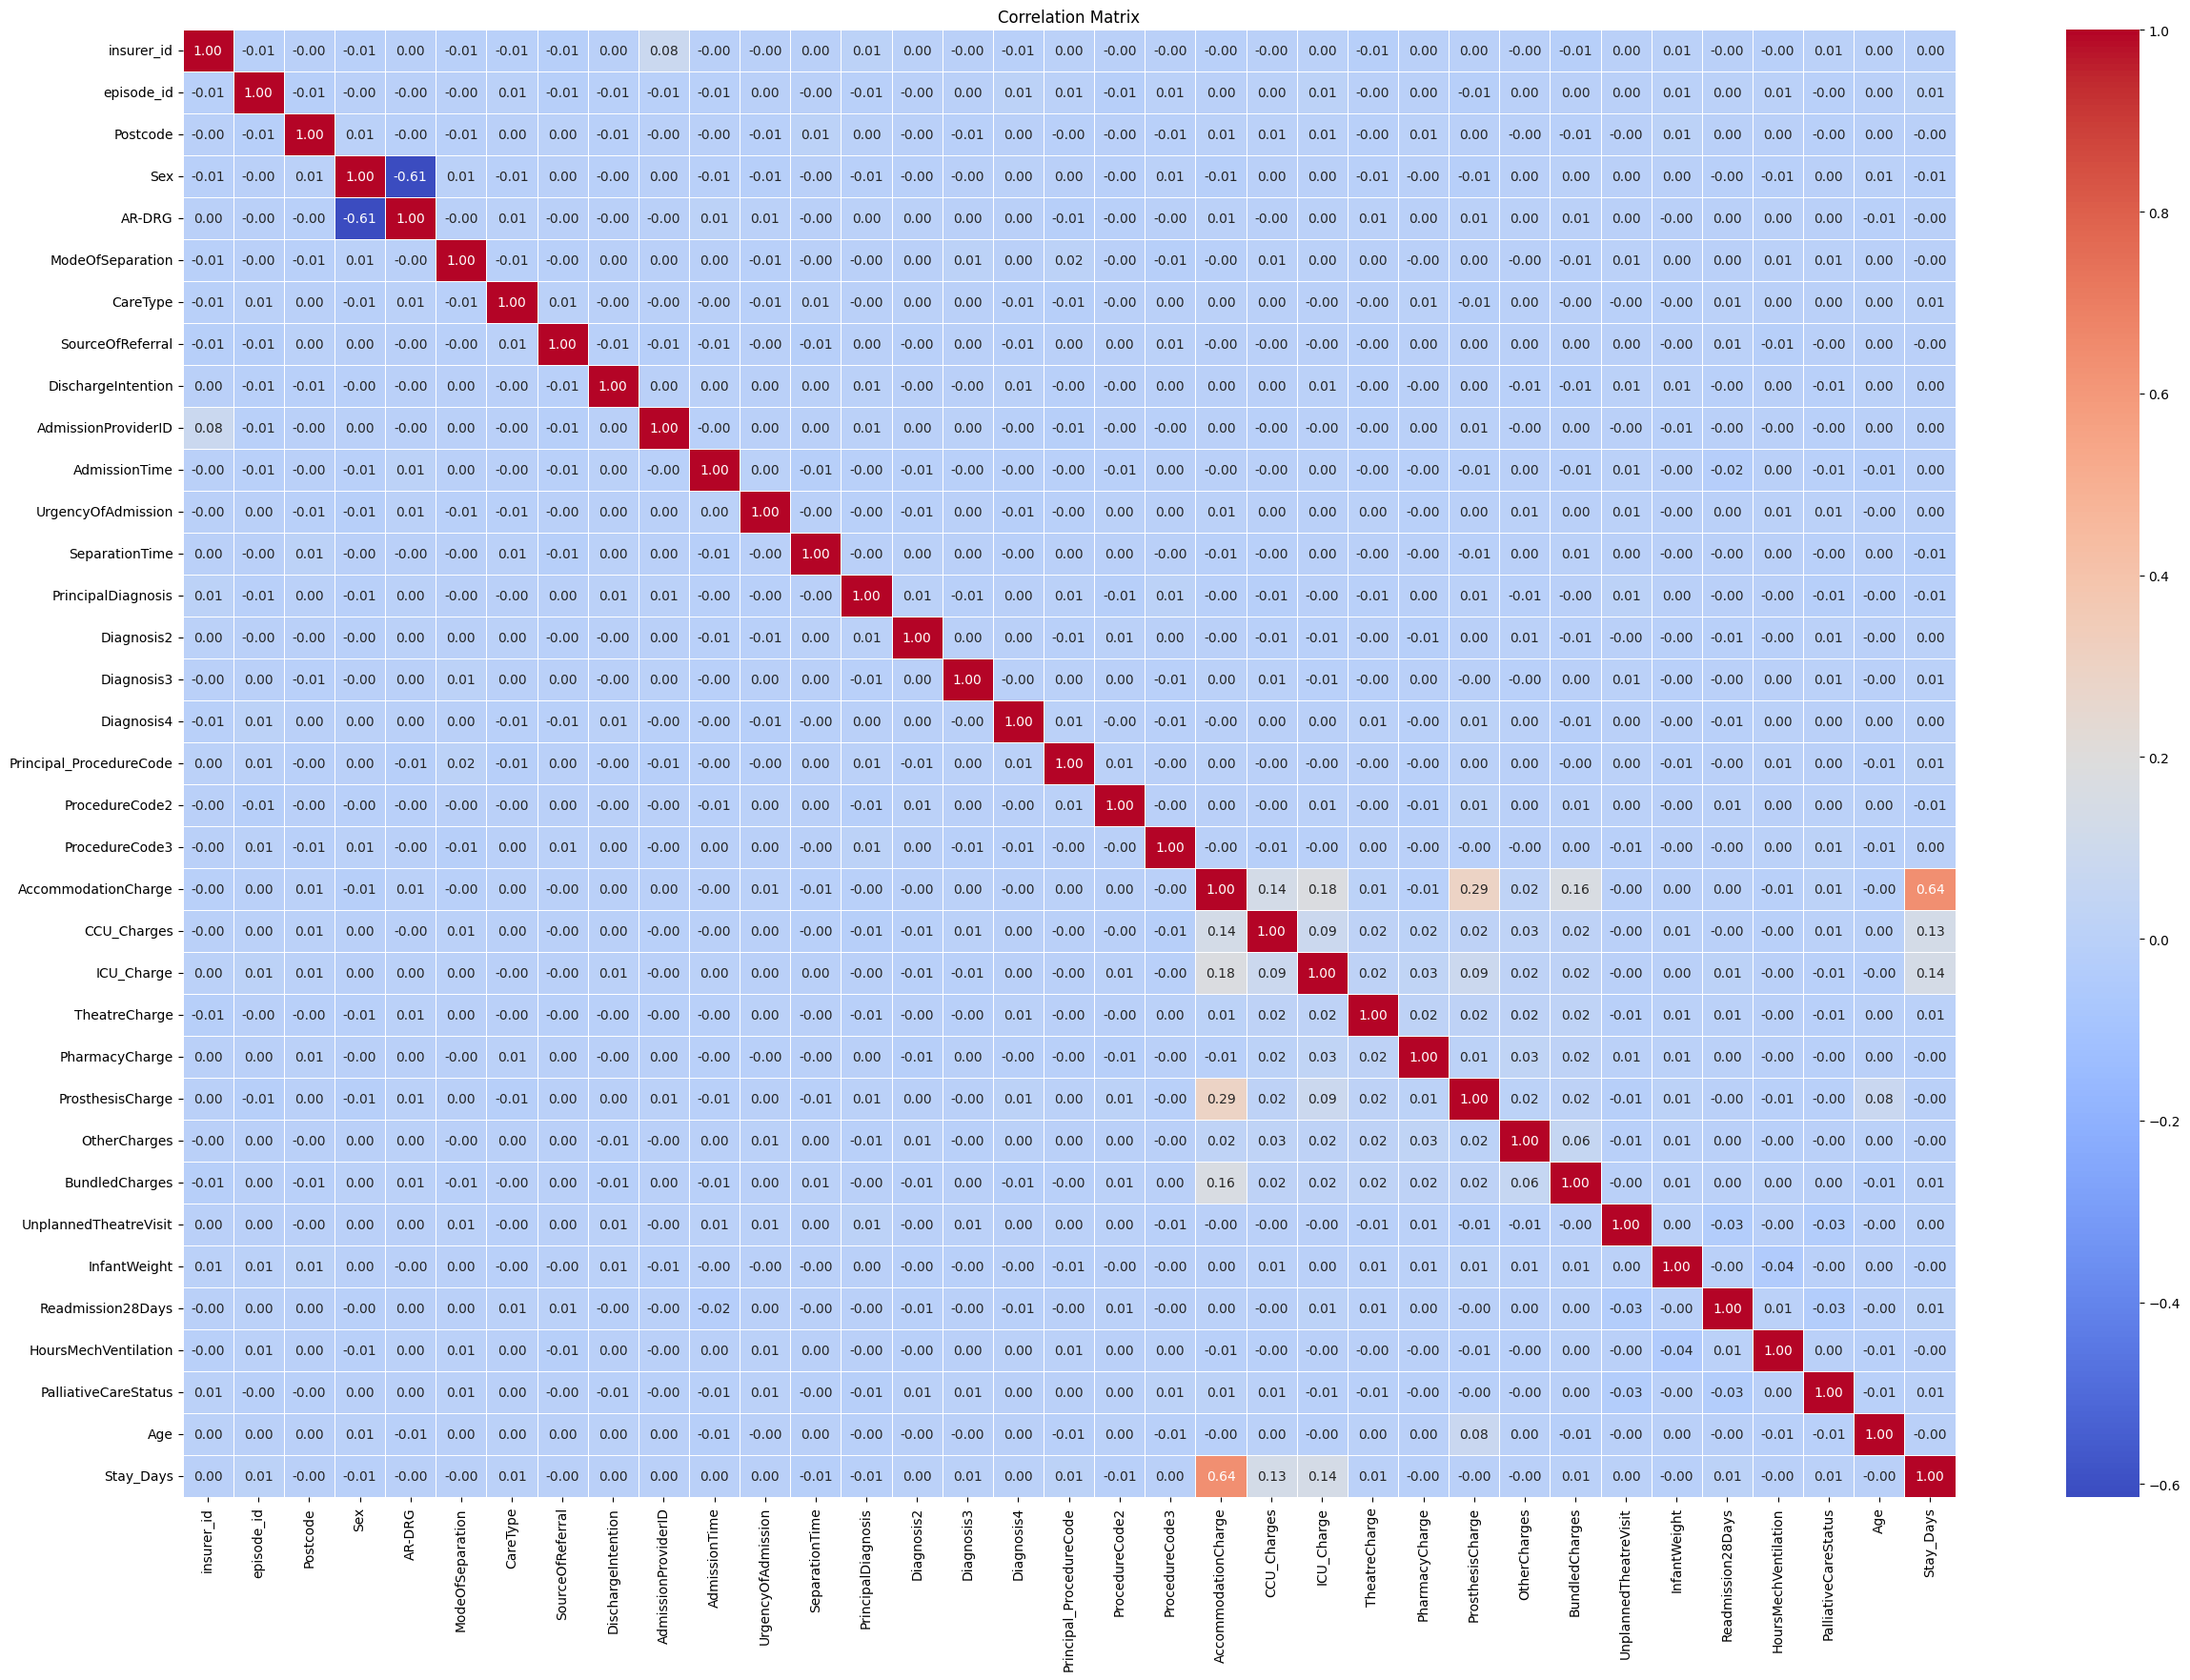

In [ ]:
# Calculate correlation matrix
correlation_matrix = df2.corr()

# Create heatmap
plt.figure(figsize=(30, 20))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

# **Finding Outliners**

In [ ]:
columns_to_check = ['AccommodationCharge', 'CCU_Charges', 'ICU_Charge', 'TheatreCharge', 'PharmacyCharge', 'ProsthesisCharge', 'BundledCharges']

# Function to find records with outliers
def find_outliers_pandas(data, column):
	Q1 = data[column].quantile(0.25)
	Q3 = data[column].quantile(0.75)
	IQR = Q3 - Q1
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR
	outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
	return outliers

# Find records with outliers for each specified column
outliers_dict = {}

for column in columns_to_check:
	outliers_dict[column] = find_outliers_pandas(df[['insurer_id','AccommodationCharge', 'CCU_Charges', 'ICU_Charge', 'TheatreCharge', 'PharmacyCharge', 'ProsthesisCharge', 'BundledCharges']], column)

# Print the records with outliers for each column
for column, outliers in outliers_dict.items():
	print(f"Outliers in '{column}':")
	print(outliers)
	print("\n")

# **Density Distribution**

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


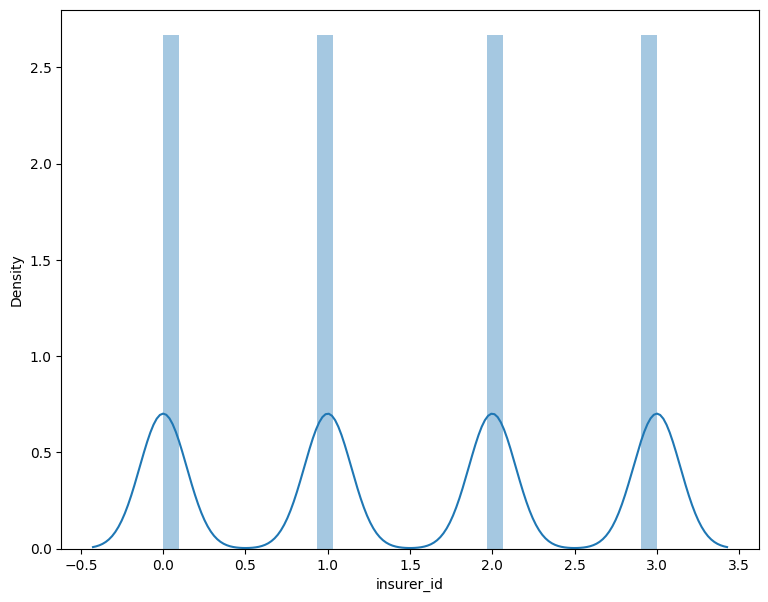

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


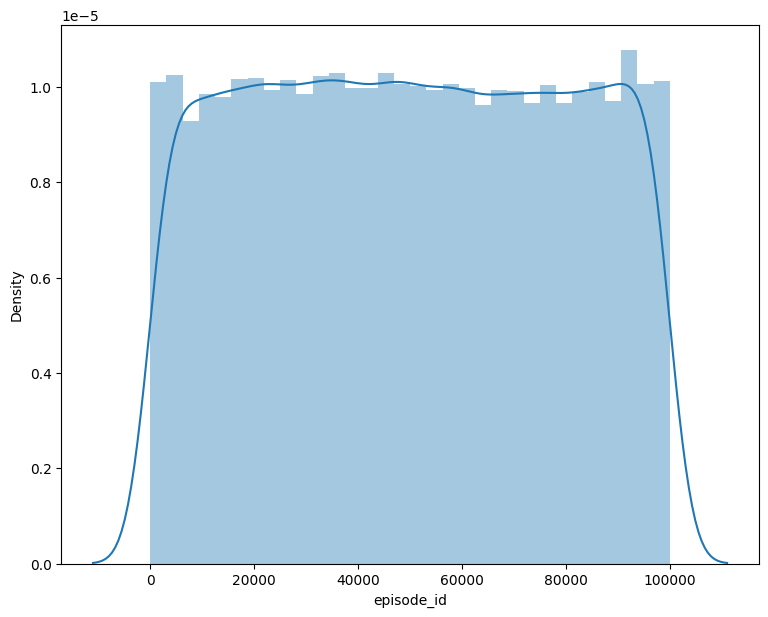

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


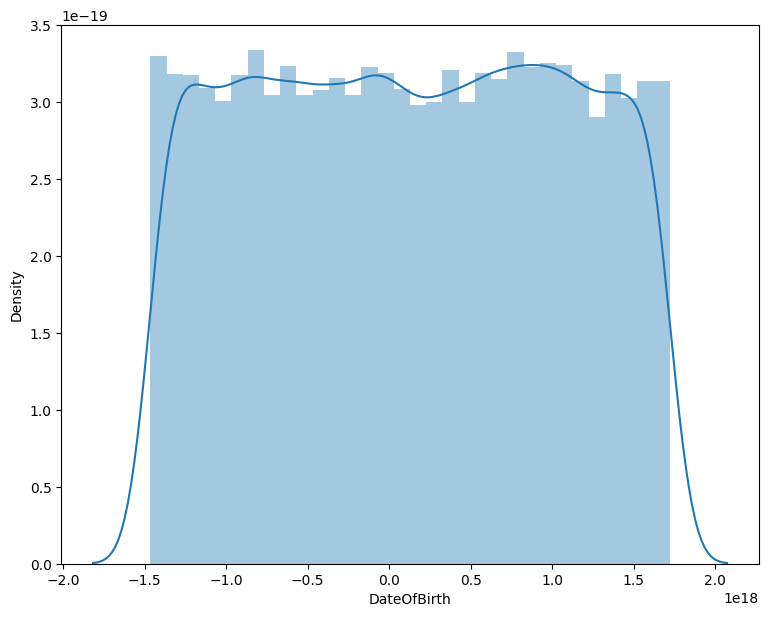

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


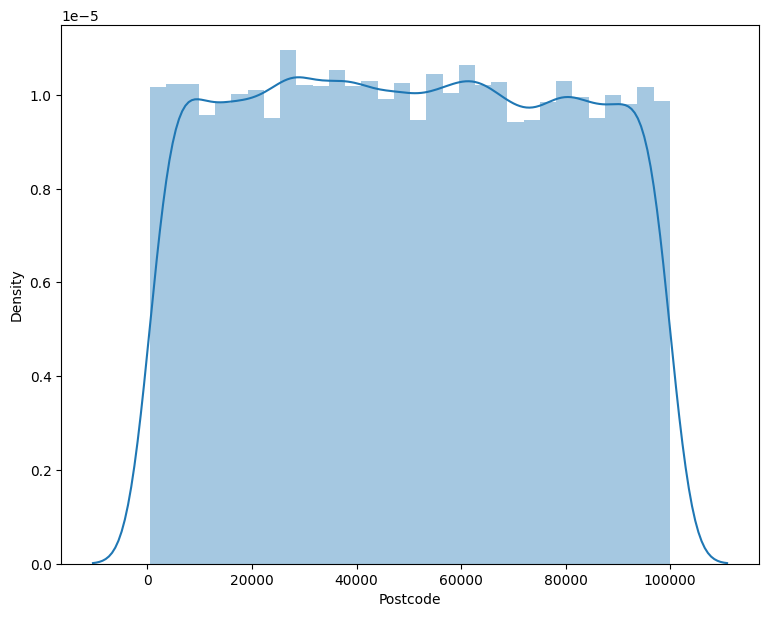

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


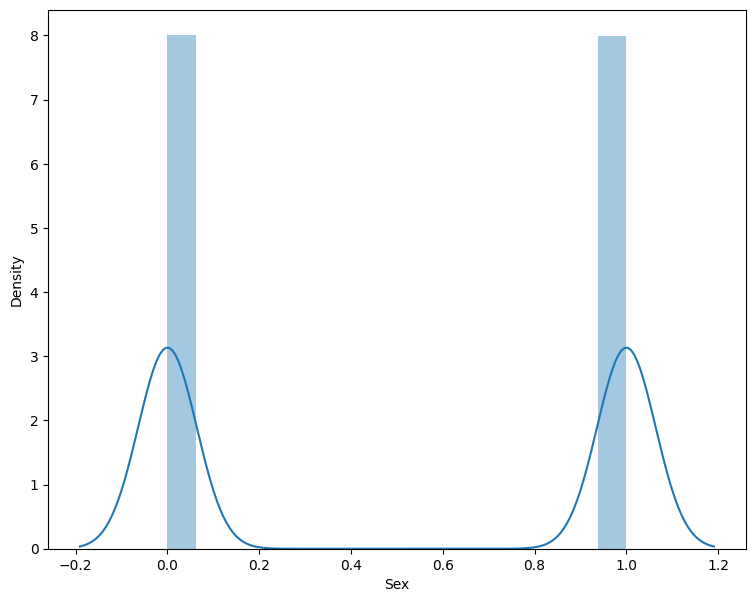

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


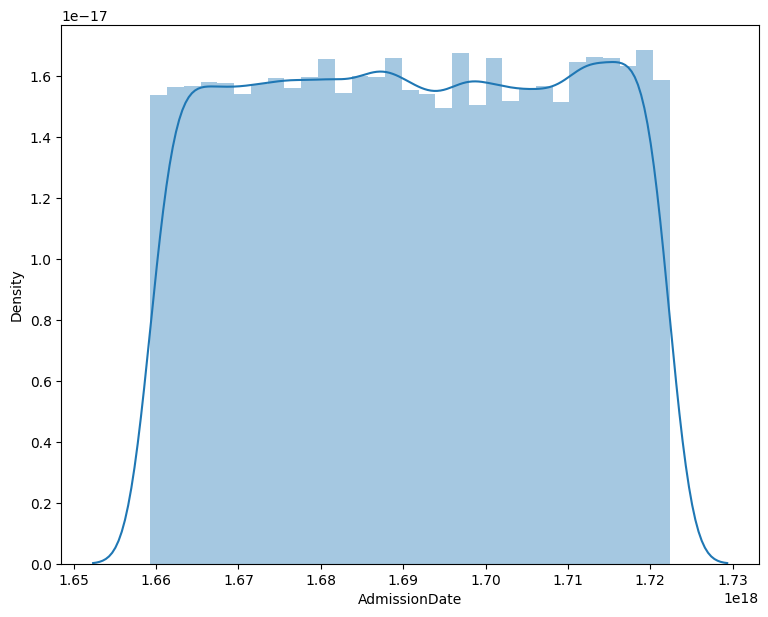

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


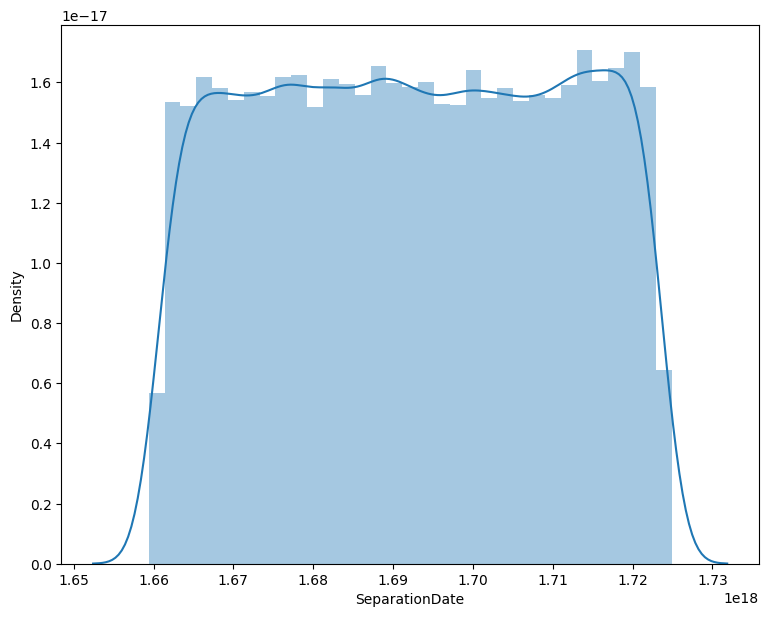

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


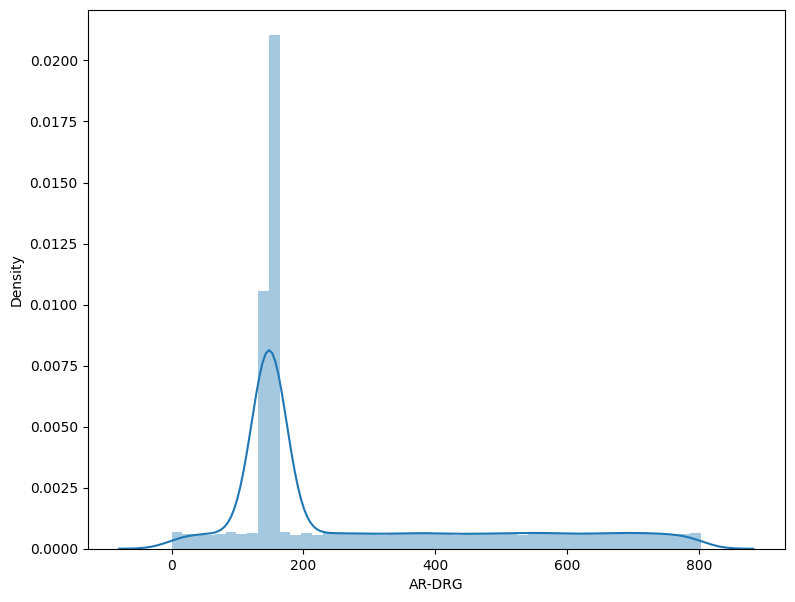

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


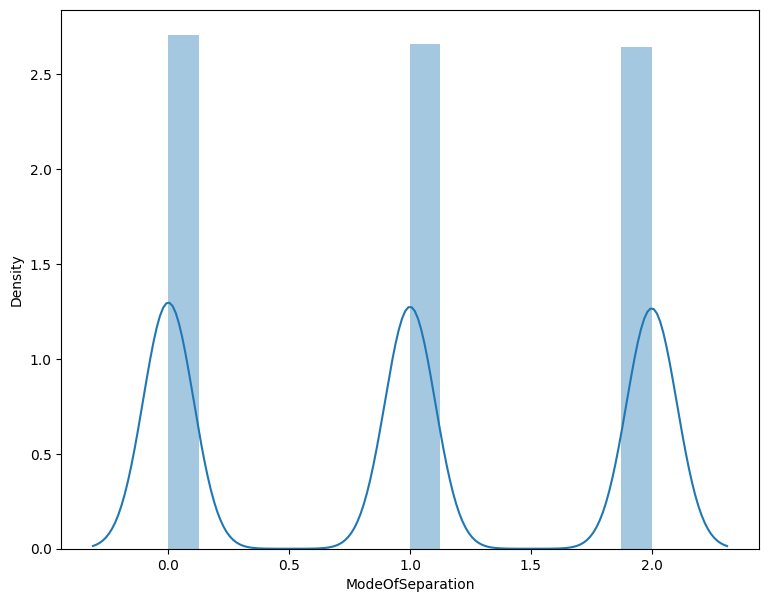

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


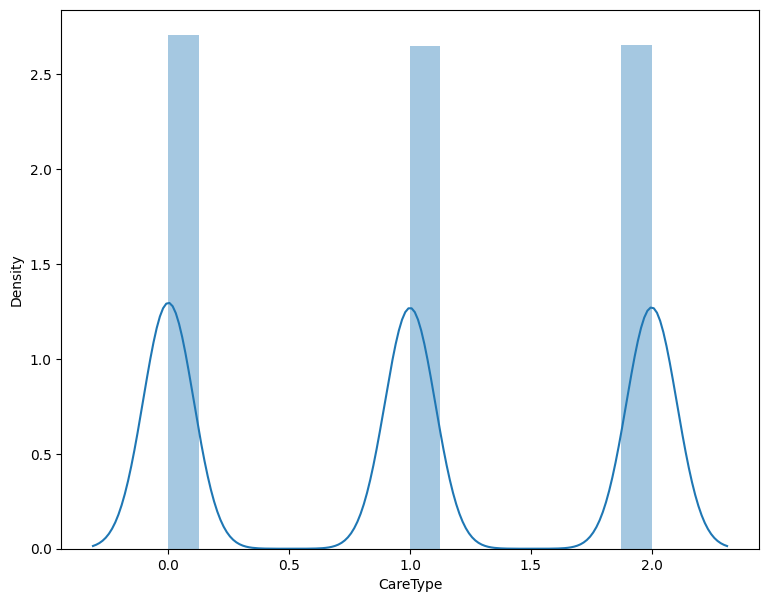

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


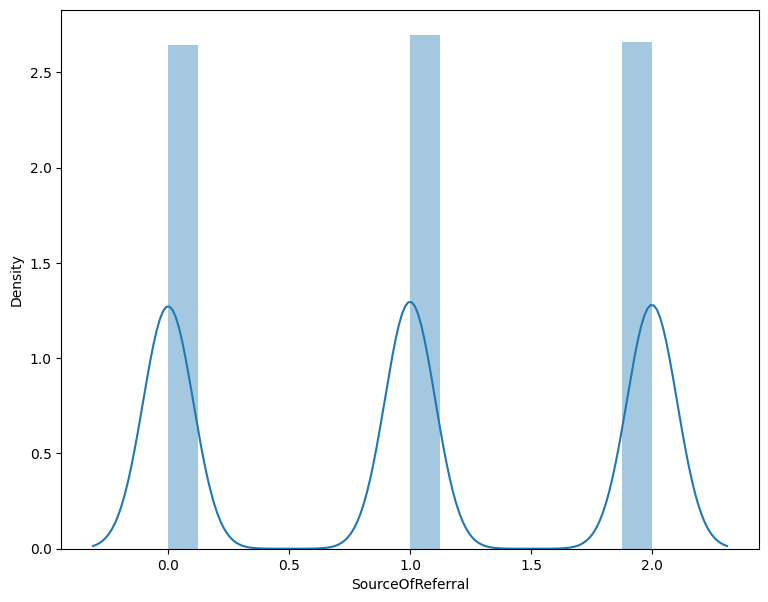

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


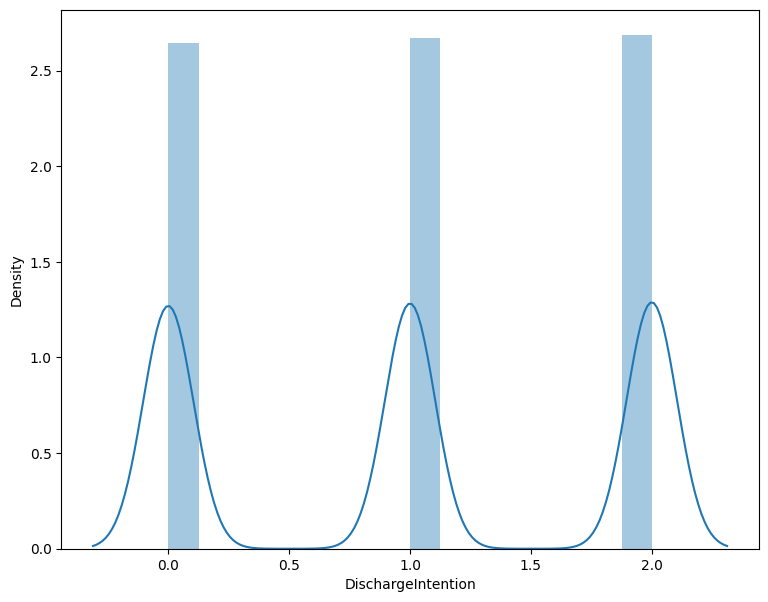

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


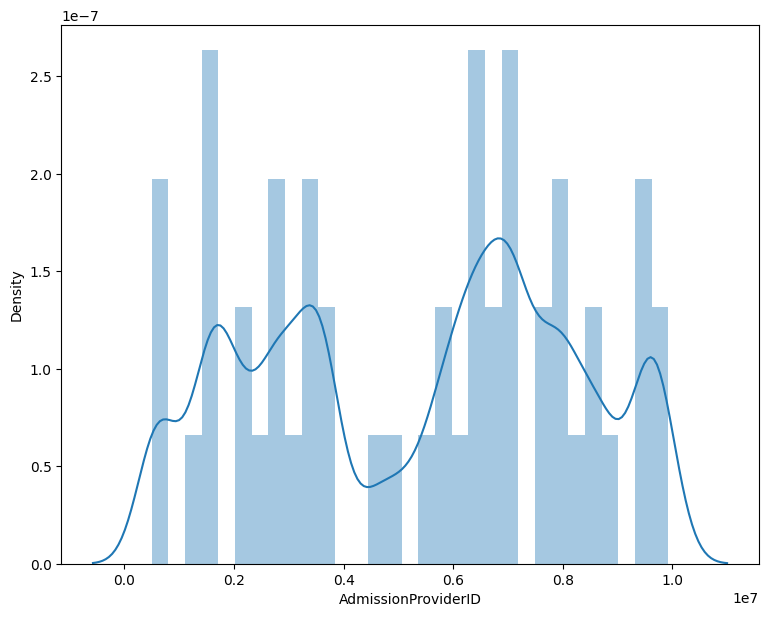

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


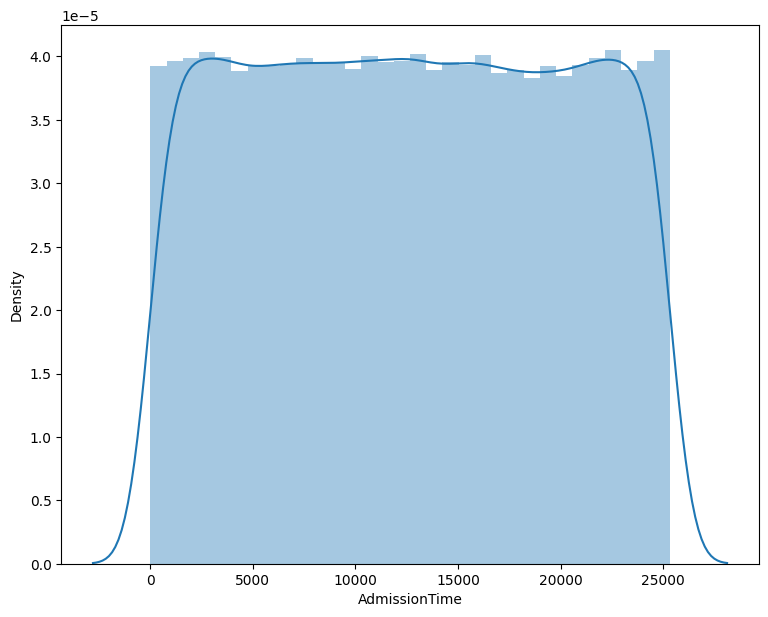

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


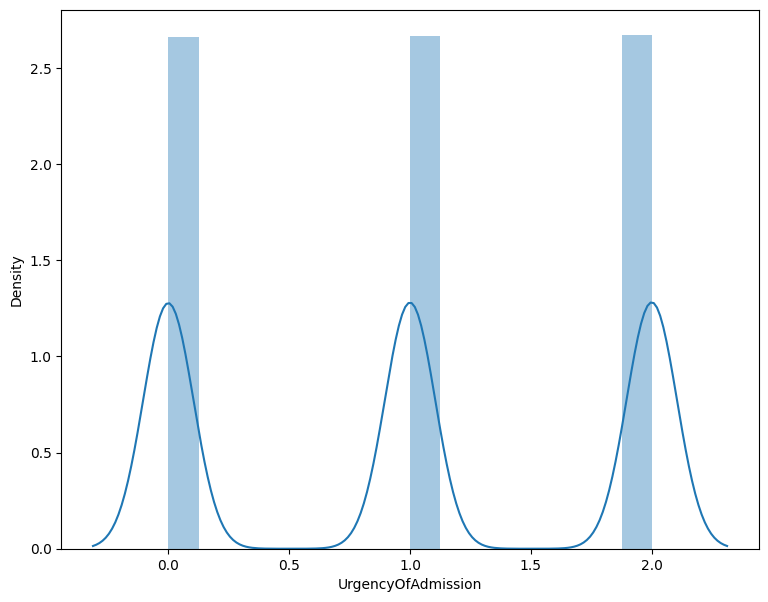

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


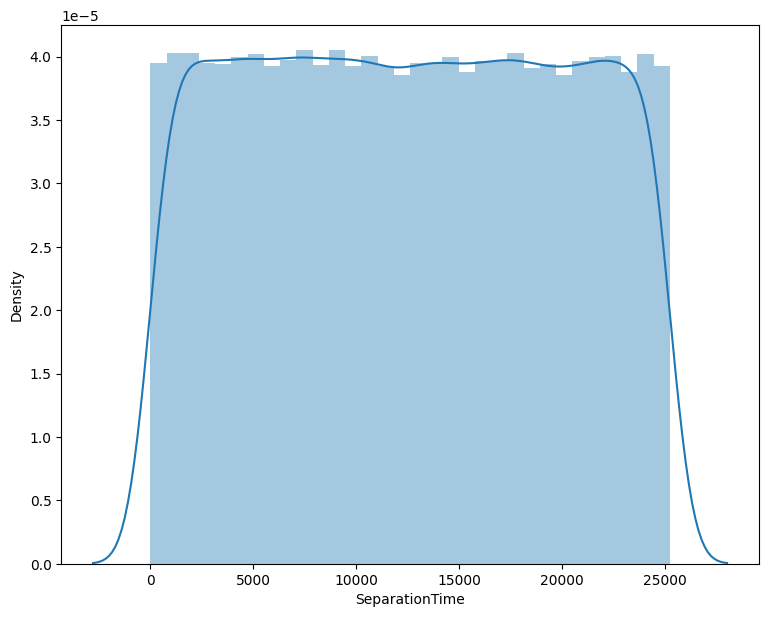

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


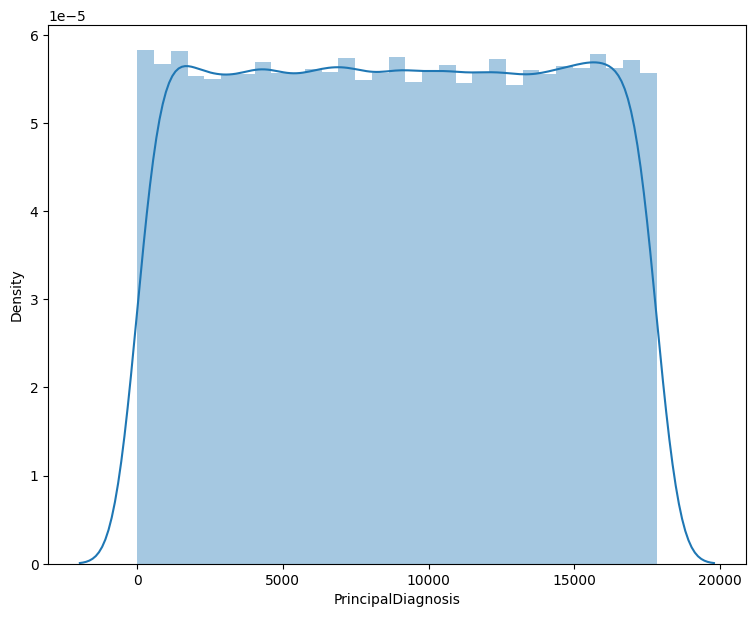

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


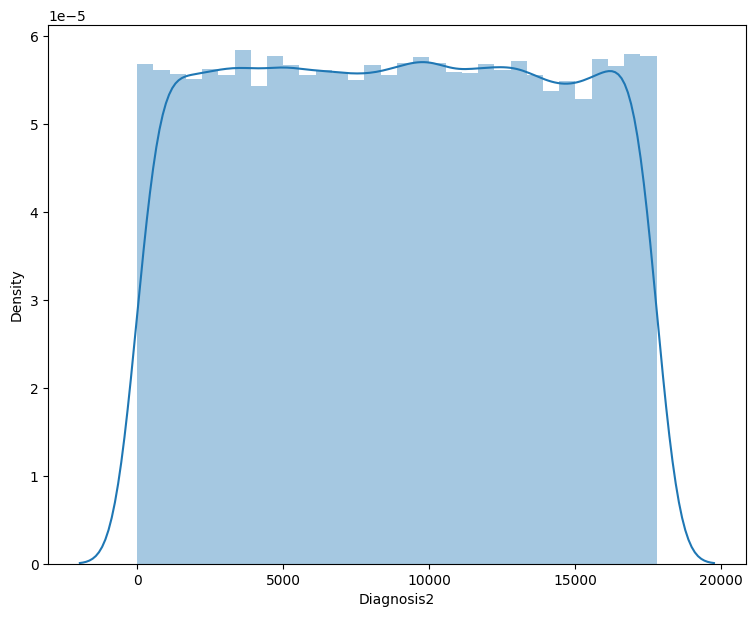

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


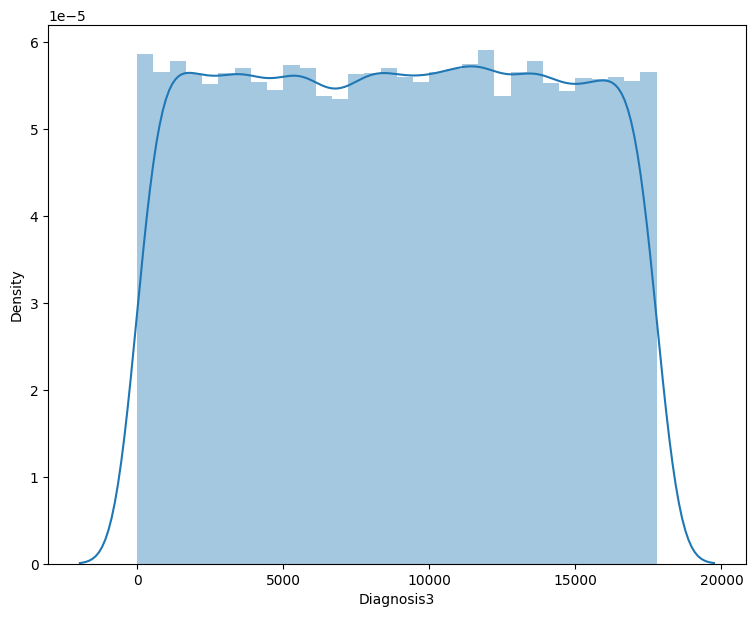

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


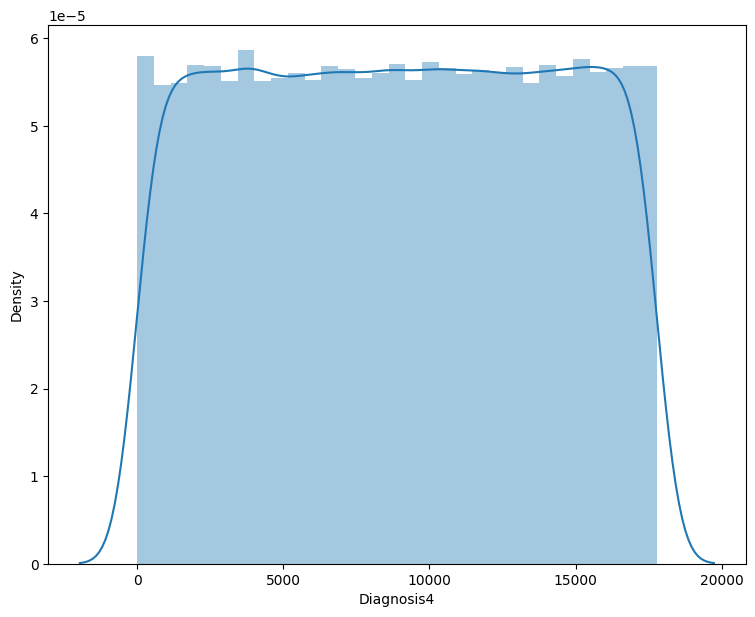

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


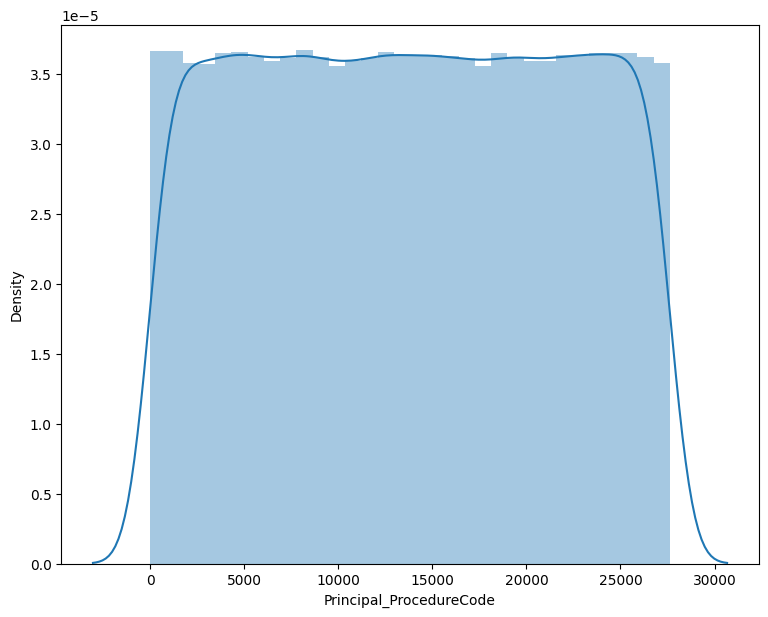

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


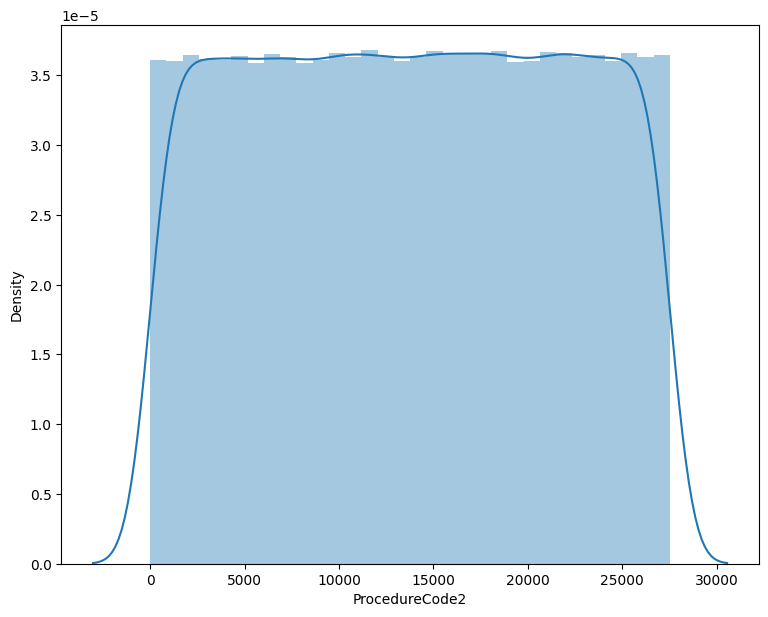

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


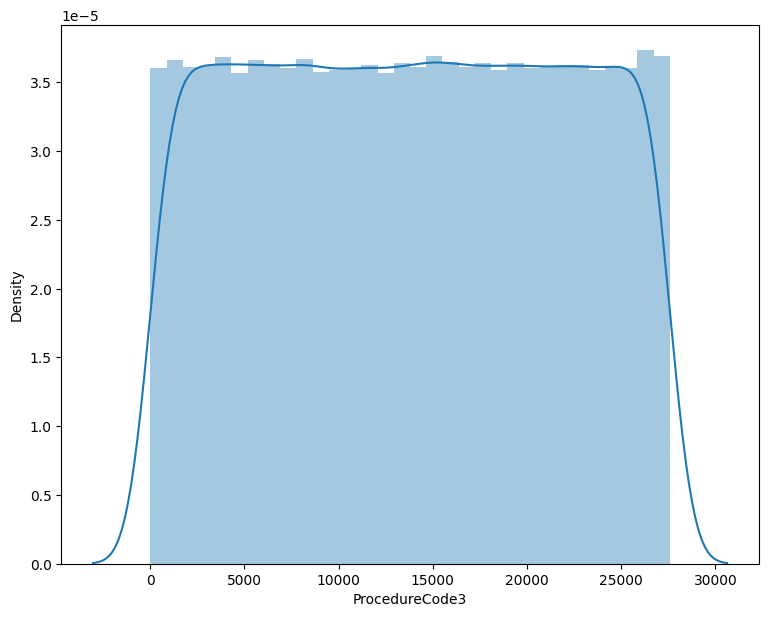

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


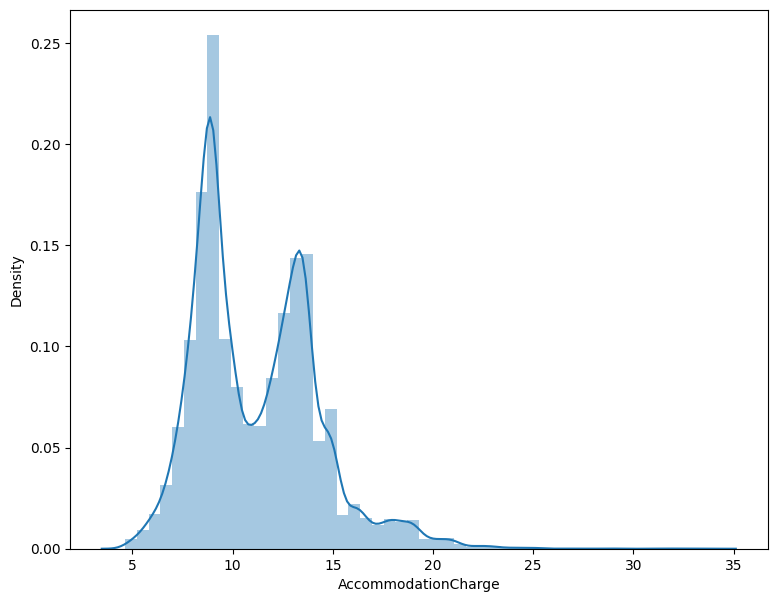

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


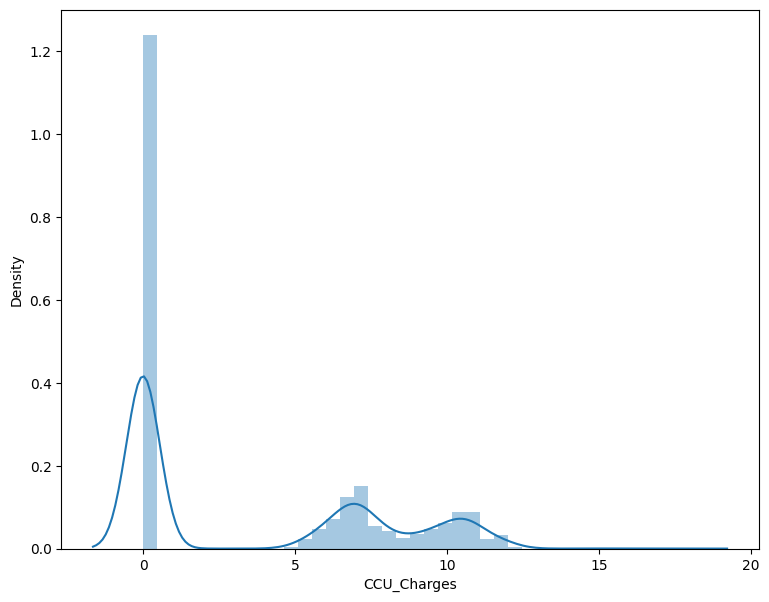

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


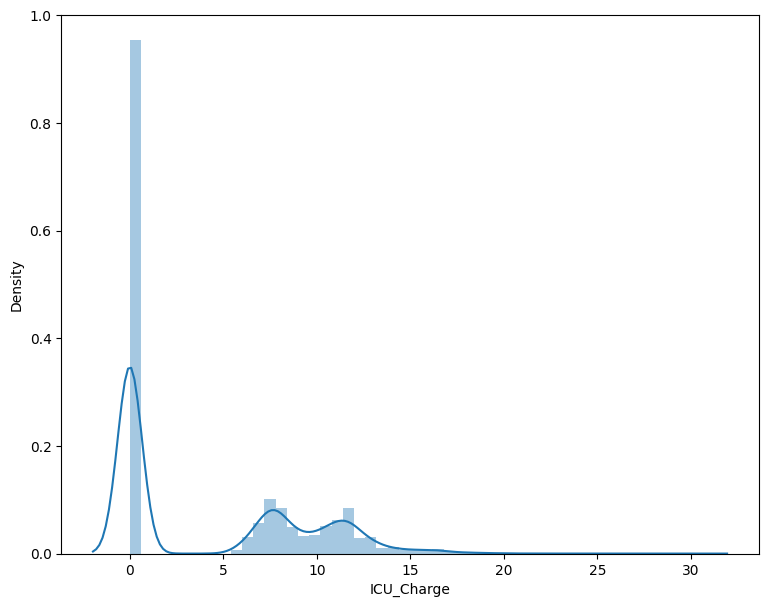

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


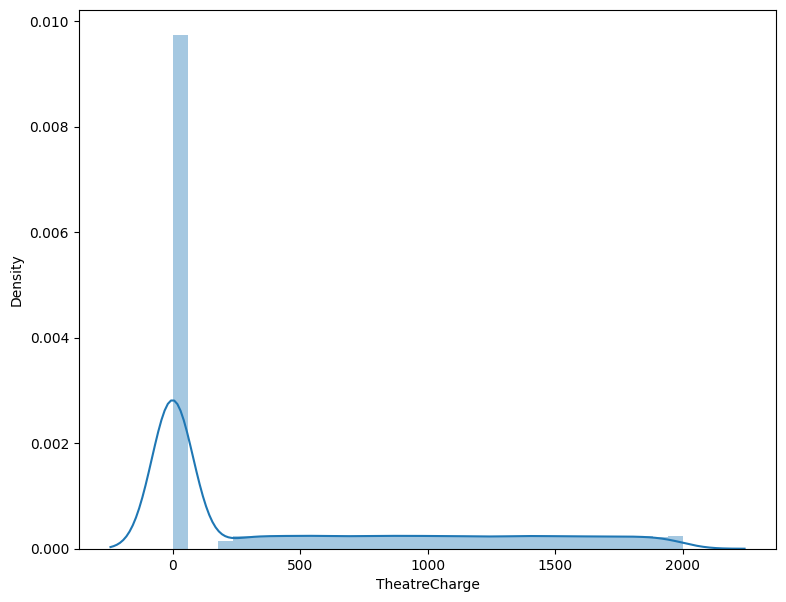

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


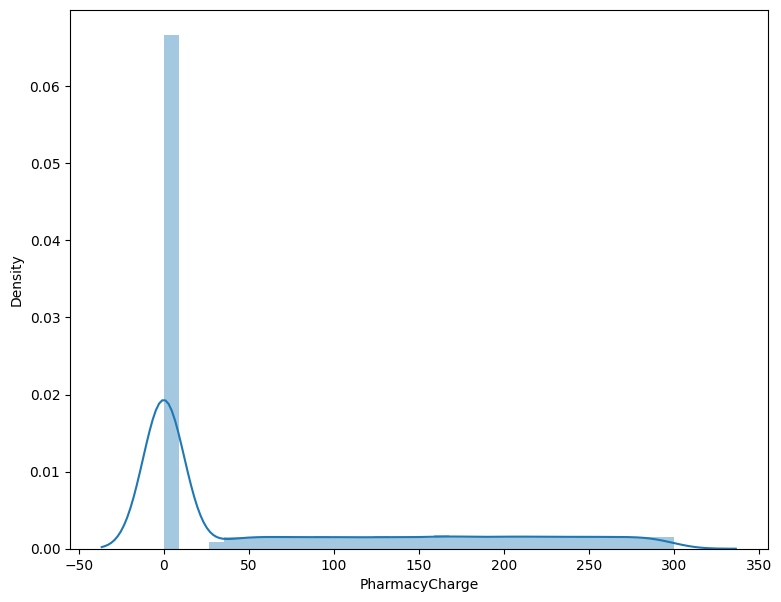

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


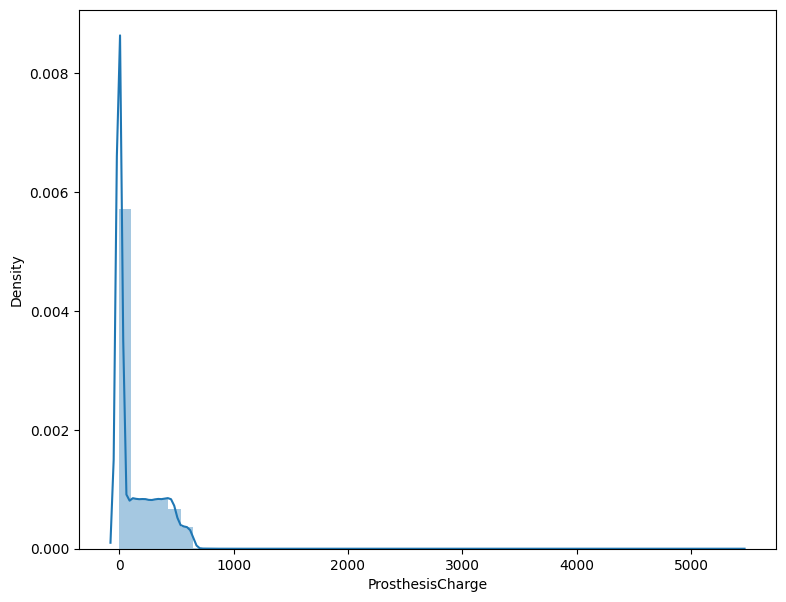

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


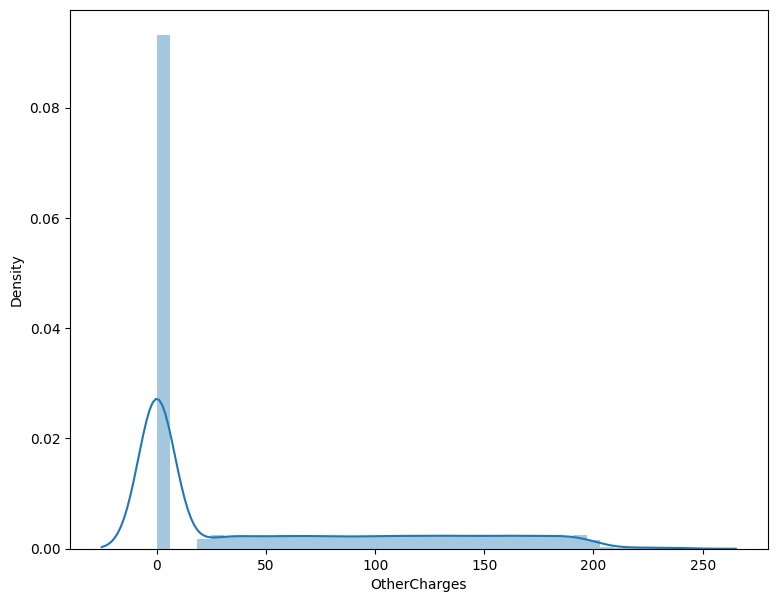

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


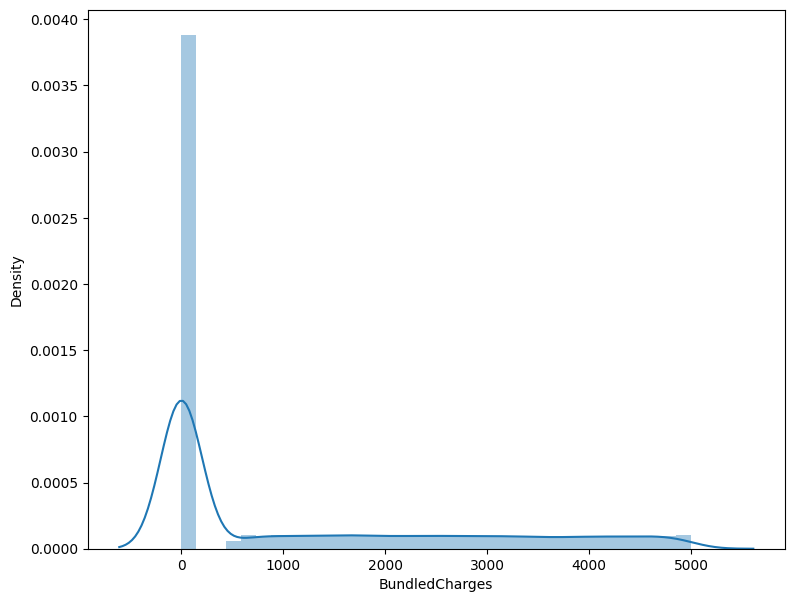

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


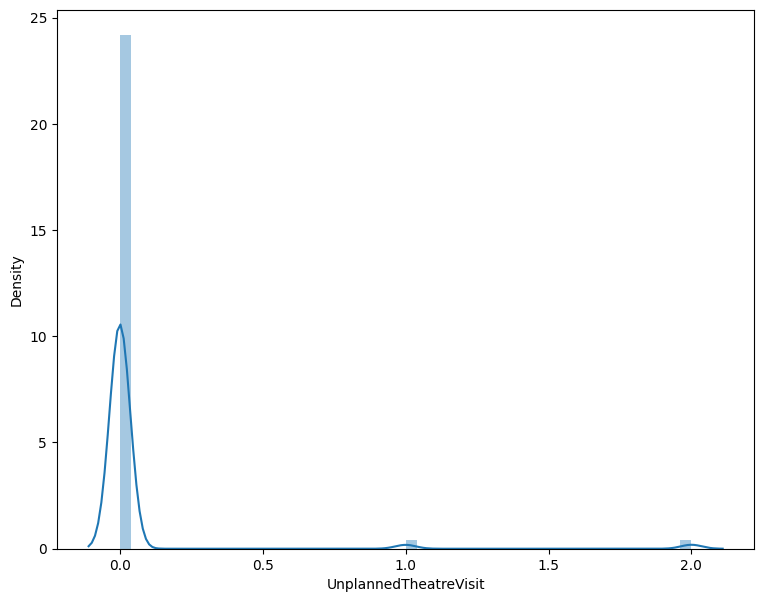

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


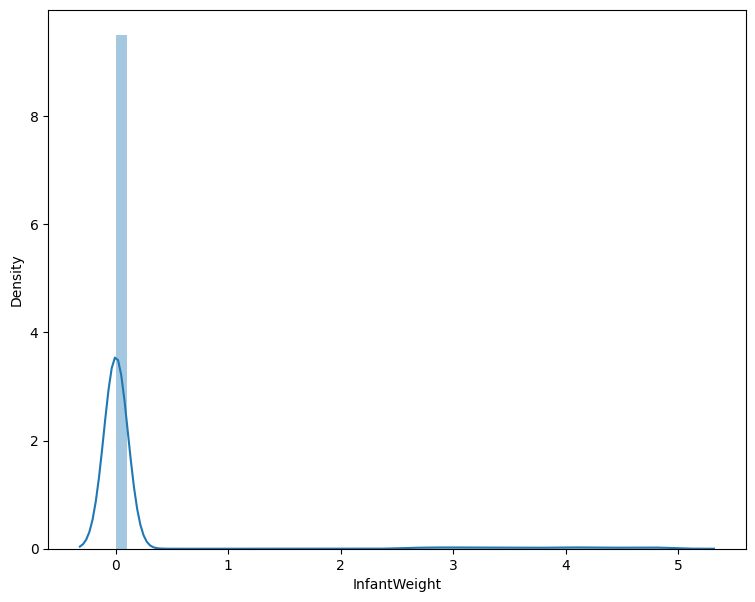

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


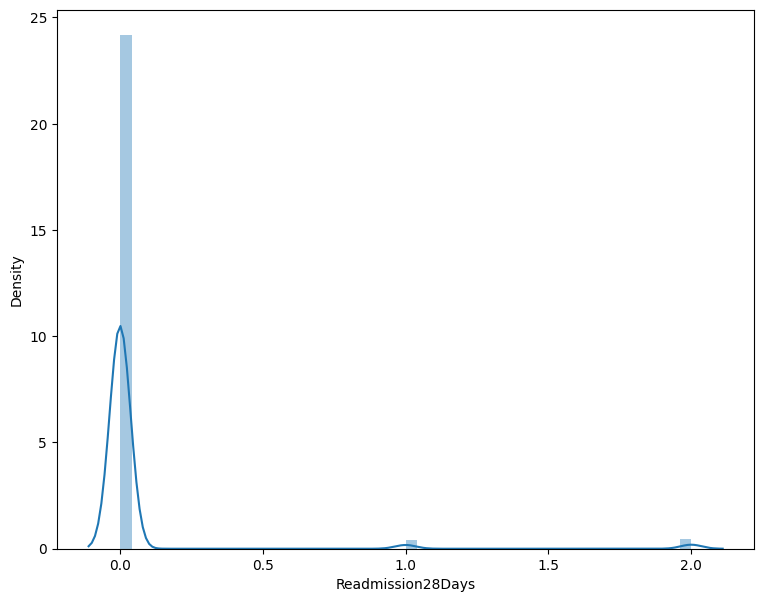

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


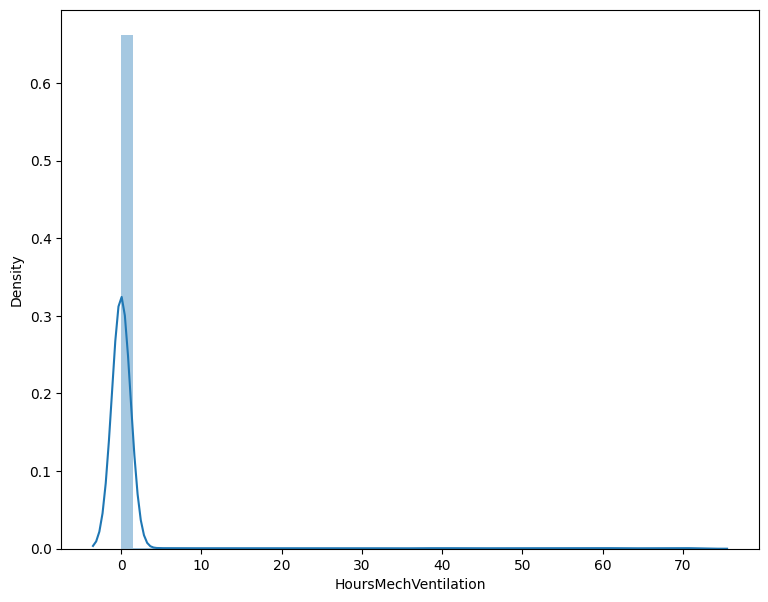

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


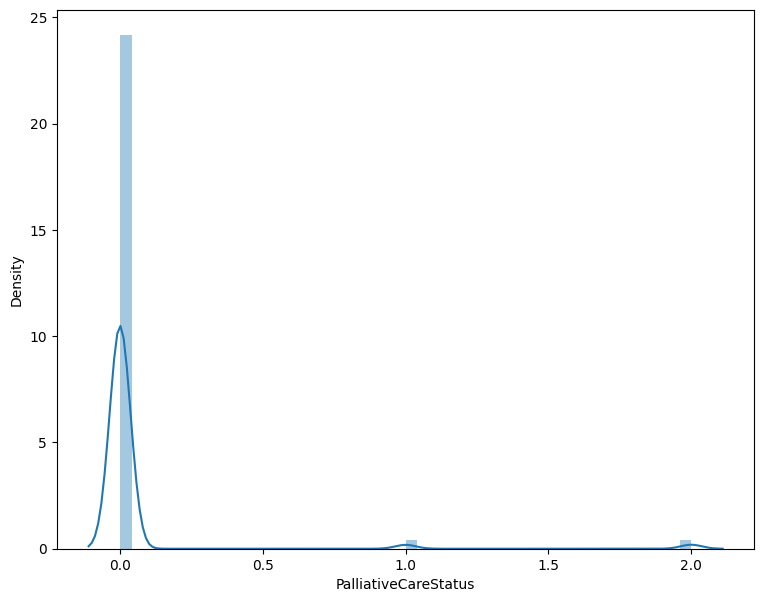

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


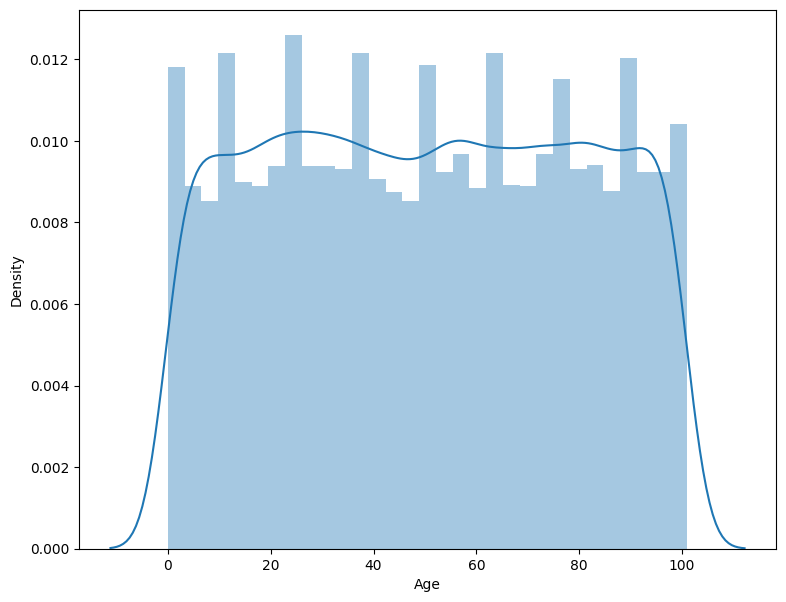

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


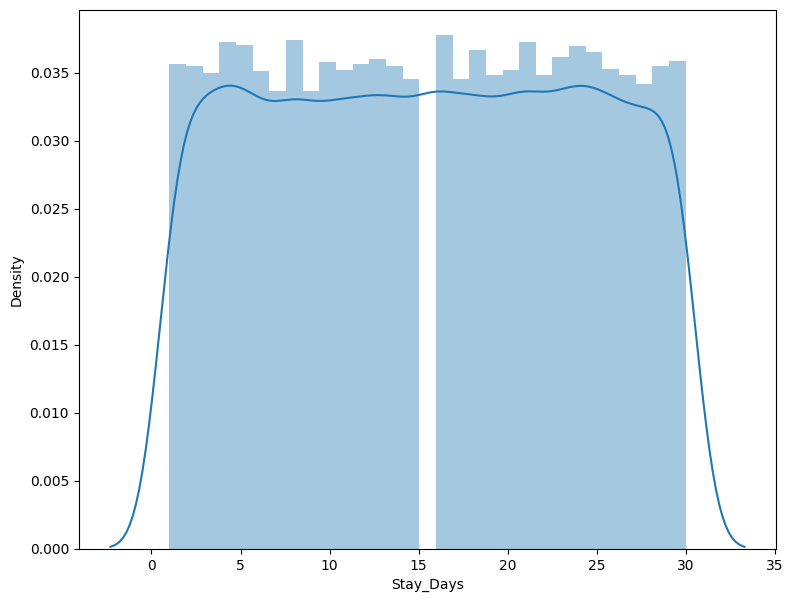

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


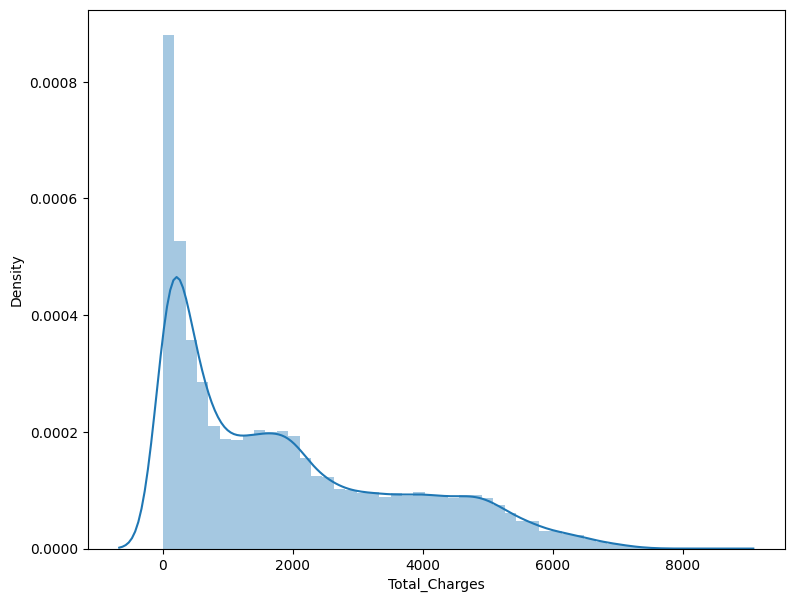

<ipython-input-22-ae8b0a366ff8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numberical_features[i])


ValueError: could not convert string to float: '0-10'

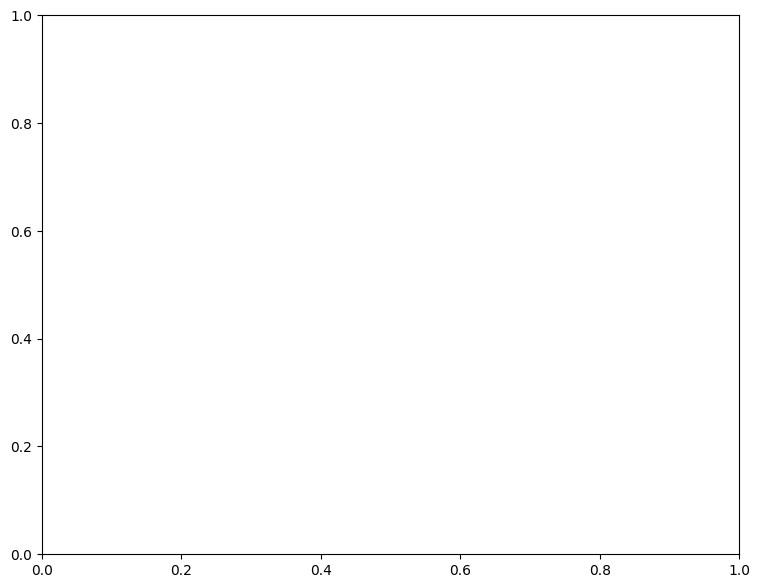

In [ ]:
numberical_features =  df.select_dtypes(exclude=[object])
for i in numberical_features.columns:
    plt.figure(figsize=(9, 7))
    sns.distplot(numberical_features[i])
    plt.show()

# **Finding Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Select only numerical features for VIF calculation
numerical_features = df.select_dtypes(include=['number']) # This line ensures only numerical data is used

vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i)
                   for i in range(len(numerical_features.columns))]

# Convert the 'VIF' column to numeric, handling errors
vif_data["VIF"] = pd.to_numeric(vif_data["VIF"], errors='coerce')

vif_data["VIF"] = vif_data["VIF"].astype('float64').round(2)
# Apply formatting to each element of the Series instead of the entire Series.
vif_data["VIF"] = vif_data["VIF"].apply(lambda x: float("{:.8f}".format(x)))

print(vif_data)

                    feature           VIF
0                insurer_id  2.760000e+00
1                episode_id  3.840000e+00
2                  Postcode  3.890000e+00
3                       Sex  2.980000e+00
4                    AR-DRG  4.080000e+00
5          ModeOfSeparation  2.430000e+00
6                  CareType  2.430000e+00
7          SourceOfReferral  2.460000e+00
8        DischargeIntention  2.470000e+00
9       AdmissionProviderID  4.440000e+00
10            AdmissionTime  3.810000e+00
11       UrgencyOfAdmission  2.450000e+00
12           SeparationTime  3.820000e+00
13       PrincipalDiagnosis  3.820000e+00
14               Diagnosis2  3.840000e+00
15               Diagnosis3  3.820000e+00
16               Diagnosis4  3.840000e+00
17  Principal_ProcedureCode  3.840000e+00
18           ProcedureCode2  3.840000e+00
19           ProcedureCode3  3.840000e+00
20      AccommodationCharge  5.610027e+07
21              CCU_Charges  1.306006e+07
22               ICU_Charge  1.850

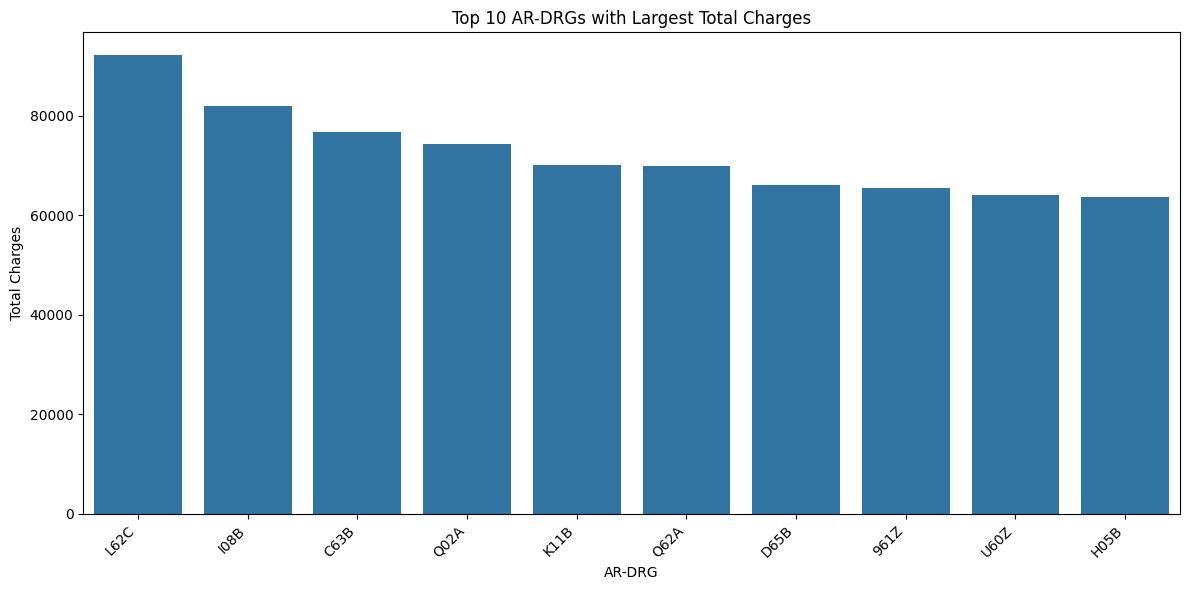

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of excluded values
excluded_values = ['DRG001', 'DRG002', 'DRG003']

# Create a new DataFrame by filtering out rows with excluded values
filtered_df = df[~df['AR-DRG'].isin(excluded_values)]

# Group by AR-DRG and sum Total_Charges
ar_drg_charges = filtered_df.groupby('AR-DRG')['Total_Charges'].sum().sort_values(ascending=False)



# Select top N AR-DRGs (e.g., top 10)
top_n = 10
top_ar_drg_charges = ar_drg_charges.head(top_n)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ar_drg_charges.index, y=top_ar_drg_charges.values)
plt.xlabel("AR-DRG")
plt.ylabel("Total Charges")
plt.title(f"Top {top_n} AR-DRGs with Largest Total Charges")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-25-c356bc6b8395>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentiles_df = df.groupby(['PrincipalDiagnosis', 'Sex']).apply(calculate_percentiles).reset_index()


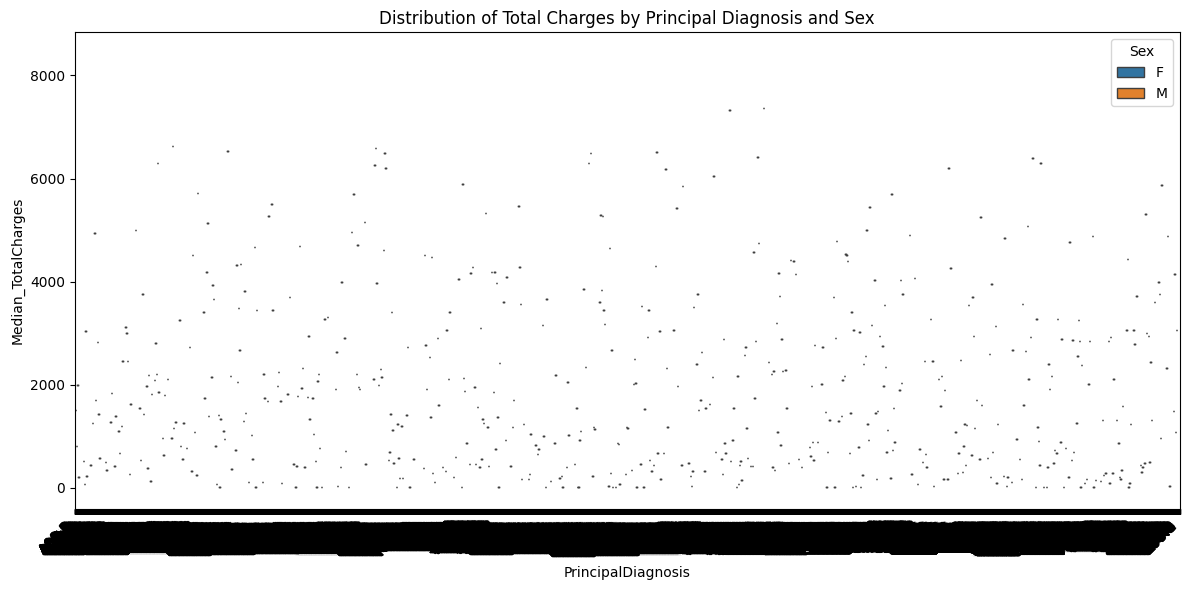

In [ ]:
# Calculate percentiles
def calculate_percentiles(group):
    return pd.Series({
        'Median_TotalCharges': group['Total_Charges'].quantile(0.5),
        'Q1_TotalCharges': group['Total_Charges'].quantile(0.25),
        'Q3_TotalCharges': group['Total_Charges'].quantile(0.75)
    })

percentiles_df = df.groupby(['PrincipalDiagnosis', 'Sex']).apply(calculate_percentiles).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='PrincipalDiagnosis', y='Median_TotalCharges', hue='Sex', data=percentiles_df)
plt.title('Distribution of Total Charges by Principal Diagnosis and Sex')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# **Logistic Regression to see drivers impacting the AR_DRG**

In [ ]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

df = df.drop(['Date of Birth', 'Admission Date', 'Separation Date','DateOfBirth','AdmissionDate','SeparationDate','Age_Group'], axis=1, errors='ignore')

In [ ]:
df.head()

insurer_id  episode_id  Postcode  Sex  AR-DRG  ModeOfSeparation  CareType  \
0           0       78773     64012    0     110                 1         1   
1           3         325     37800    0     638                 1         2   
2           2       44678     31072    0      21                 2         0   
3           1       83603     33340    0      76                 1         1   
4           0       85397     58698    1     148                 2         1   

   SourceOfReferral  DischargeIntention  AdmissionProviderID  ...  \
0                 0                   0              9506672  ...   
1                 2                   0              6294165  ...   
2                 0                   2              9522923  ...   
3                 2                   1              2058078  ...   
4                 2                   0               500155  ...   

   OtherCharges  BundledCharges  UnplannedTheatreVisit  InfantWeight  \
0          0.00            0.00                      0          0.00   
1         55.01            0.00                      0          0.00   
2          0.00         3752.66                      0          0.00   
3         90.51            0.00                      1          0.00   
4         69.16            0.00                      0          4.14   

   Readmission28Days  HoursMechVentilation  PalliativeCareStatus  Age  \
0                  0                   0.0                     0    9   
1                  0                   0.0                     0   54   
2                  0                   0.0                     0    4   
3                  0                   0.0                     0   41   
4                  0                   0.0                     0    4   

   Stay_Days  Total_Charges  
0          7        2053.68  
1         29         553.04  
2          6        3953.90  
3         25         105.12  
4          8        1071.13  

[5 rows x 36 columns]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Or another regression model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Assuming 'df' is your DataFrame and 'target_variable' is the name of your target column
target_variable = 'Total_Charges'  # Replace 'TargetColumnName' with the actual target column name

# Select features and target variable
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

x = sm.add_constant(y)

# Create and train the logistic regression model
#fit linear regression model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

# Make predictions on the test set
#y_pred = model.predict(X_test)




                                 OLS Regression Results                                
Dep. Variable:          Total_Charges   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.021e+15
Date:                Tue, 15 Oct 2024   Prob (F-statistic):                        0.00
Time:                        01:36:04   Log-Likelihood:                      1.2181e+05
No. Observations:               24000   AIC:                                 -2.435e+05
Df Residuals:                   23965   BIC:                                 -2.433e+05
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

# **Cat Boost classifier for predictive model**

In [ ]:
#!pip install catboost # Install the catboost package
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'target_variable' is your target column name
target_variable = 'AR-DRG'  # Replace with your actual target column name

# Identify categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# If 'AR-DRG' is in the categorical features, remove it
if target_variable in categorical_features:
    categorical_features.remove(target_variable)

# Split data into training and testing sets
X = df.drop(columns=[target_variable])
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CatBoost Pool objects
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# Initialize and train the CatBoost Classifier
model = CatBoostClassifier(iterations=5,  # Adjust as needed
                           learning_rate=0.1,  # Adjust as needed
                           depth=6,  # Adjust as needed
                           loss_function='MultiClass',  # Assuming multi-class classification
                           random_seed=42)  # For reproducibility

model.fit(train_pool)

# Make predictions on the test set
y_pred = model.predict(test_pool)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


0:	learn: 4.5715262	total: 1m 5s	remaining: 4m 20s
1:	learn: 4.4067357	total: 1m 35s	remaining: 2m 23s
2:	learn: 4.2918805	total: 2m 7s	remaining: 1m 25s
3:	learn: 4.2039791	total: 2m 41s	remaining: 40.3s
4:	learn: 4.1363945	total: 3m 11s	remaining: 0us
Accuracy: 0.17133333333333334


# **Evaluation**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.17133333333333334
Precision: 0.17094966952502916
Recall: 0.17133333333333334
F1-score: 0.16875635468123074


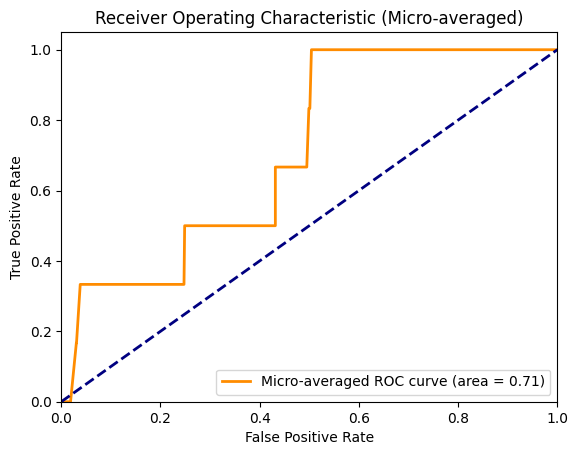

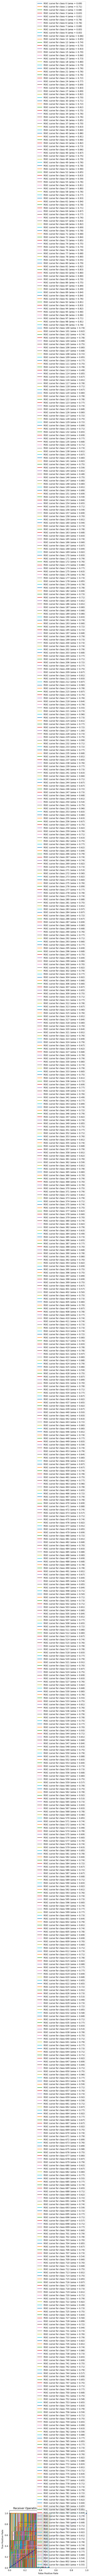

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Get probabilities for ROC curve

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# ROC Curve for multi-class classification (using micro-averaging)
# Calculate micro-averaged ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the micro-averaged ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Micro-averaged ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Micro-averaged)')
plt.legend(loc="lower right")
plt.show()

# Optionally, you can plot ROC curves for individual classes
# Get unique class labels
classes = np.unique(y_test)

# Plot ROC curve for each class
plt.figure()
for i, class_label in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, i], pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class %s (area = %0.2f)' % (class_label, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Individual Classes)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df.to_csv('Ramsay3.csv')

In [ ]:
from sklearn.cluster import KMeans

# Assuming 'df' is your DataFrame and you want to cluster based on 'Monthly_Premium' and 'AGE'
#df.fillna(0, inplace=True)
X= df1

# Choose the number of clusters (k)
k = 4  # Adjust this based on your analysis

# Create a KMeans instance
kmeans = KMeans(n_clusters=k)

# Fit the model to your data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the labels to your DataFrame
df['Cluster'] = labels

ValueError: could not convert string to float: 'EAQ'

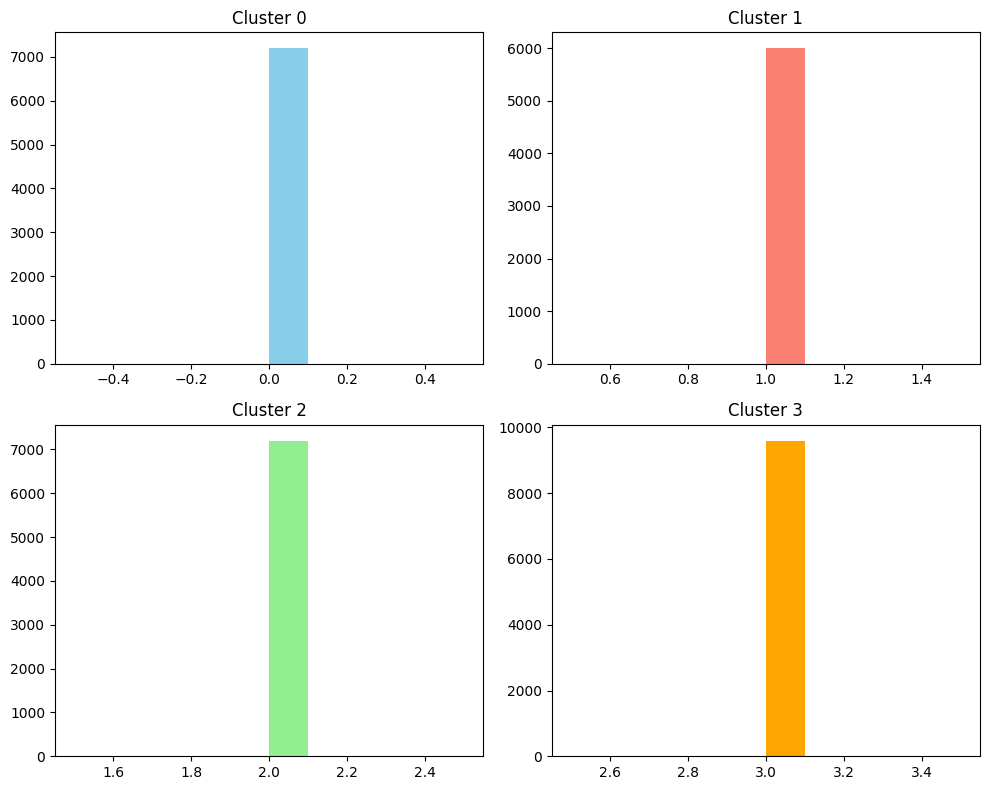

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the counts for each cluster in separate subplots
axes[0, 0].hist(df[df['Cluster'] == 0]['Cluster'], bins=10, color='skyblue')
axes[0, 0].set_title('Cluster 0')

axes[0, 1].hist(df[df['Cluster'] == 1]['Cluster'], bins=10, color='salmon')
axes[0, 1].set_title('Cluster 1')

axes[1, 0].hist(df[df['Cluster'] == 2]['Cluster'], bins=10, color='lightgreen')
axes[1, 0].set_title('Cluster 2')

# If you have a fourth cluster:
if df['Cluster'].nunique() > 3:
    axes[1, 1].hist(df[df['Cluster'] == 3]['Cluster'], bins=10, color='orange')
    axes[1, 1].set_title('Cluster 3')
else:
    fig.delaxes(axes[1, 1])  # Remove the fourth subplot if not needed

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [9]:
df.columns

Index(['insurer_id', 'episode_id', 'DateOfBirth', 'Postcode', 'Sex',
       'AdmissionDate', 'SeparationDate', 'AR-DRG', 'ModeOfSeparation',
       'CareType', 'SourceOfReferral', 'DischargeIntention',
       'AdmissionProviderID', 'AdmissionTime', 'UrgencyOfAdmission',
       'SeparationTime', 'PrincipalDiagnosis', 'Diagnosis2', 'Diagnosis3',
       'Diagnosis4', 'Principal_ProcedureCode', 'ProcedureCode2',
       'ProcedureCode3', 'AccommodationCharge', 'CCU_Charges', 'ICU_Charge',
       'TheatreCharge', 'PharmacyCharge', 'ProsthesisCharge', 'OtherCharges',
       'BundledCharges', 'UnplannedTheatreVisit', 'InfantWeight',
       'Readmission28Days', 'HoursMechVentilation', 'PalliativeCareStatus',
       'Age', 'Stay_Days', 'Total_Charges'],
      dtype='object')

In [ ]:
# Define age group bins and labels
age_bins = np.linspace(df['Age'].min(), df['Age'].max(), 11)
age_labels = [f'{int(age_bins[i])}-{int(age_bins[i+1])}' for i in range(len(age_bins) - 1)]

# Create Age_Group column
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)


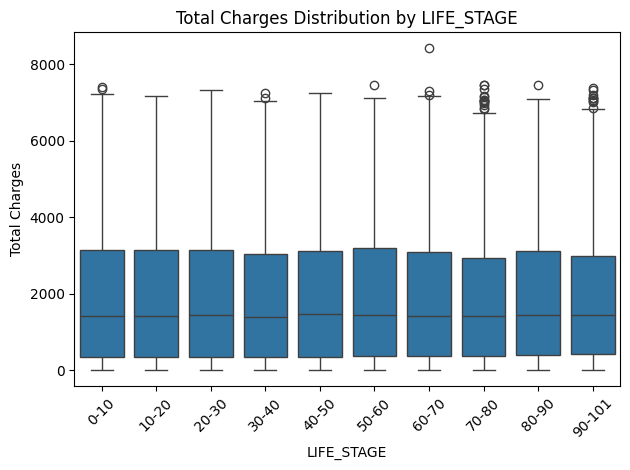

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Age_Group', y='Total_Charges', data=df)
plt.xlabel('LIFE_STAGE')
plt.ylabel('Total Charges')
plt.title('Total Charges Distribution by LIFE_STAGE')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()